hsnu

ntpu stat
 
nycu itm

# **實務應用學習**
## **目錄**
## *topic1 NBA2022-23賽季 球員得分能力預測*
## *topic2 探討針灸合併穴位貼敷，治療漏尿的療效與安全性*
## *topic3 研究維⽣素A與成長曲線的關係*
## *topic4 研究鐵劑補充品是否可以有效降低懷孕婦女貧⾎發⽣率*
## *topic5 cnn、rnn 以手寫數字辨識為例*
## *topic6 基於小型殘差網絡 (Mini-ResNet) 的手寫數字辨識模型*
## *topic7 加州房價預測：多模型回歸分析比較*
## *topic8 資料分析前的各種統計量及檢定 以羅吉斯迴歸為例(交大實驗室計畫)*
## *topic9 Titanic - Machine Learning from Disaster*
## *topic10 Game of Thrones 預測角色是否死亡。*
## *topic11 PCA 、SVD 及其在影像處理的應用*
## *topic12 Sentiment analysis*
--------------------------------------------------------------------------------------------------------------------------------------------------------------------

## *topic1 NBA2022-23賽季 球員得分能力預測* 

### [方法]
用多種模型，透過傳統籃球數據(不含得分)，去預測球員得分表現。
### [變數介紹]
Rk: 球員在統計中的排名，通常按照某種指標（如得分、籃板等）進行排名。

Player: 球員的姓名。

Pos: 球員的位置，包括後衛（Guard）、前鋒（Forward）、中鋒（Center）等。

Age: 球員的年齡。

Tm: 球員所屬的球隊縮寫。

G: 球員出場的比賽場次。

GS: 球員作為首發球員出場的比賽場次。

MP: 球員在場上的出場時間，以分鐘為單位。

FG: 球員的投籃命中數。

FGA: 球員的投籃出手數。

FG%: 球員的投籃命中率，即投籃命中數除以投籃出手數的百分比。

3P: 球員的三分球命中數。

3PA: 球員的三分球出手數。

3P%: 球員的三分球命中率，即三分球命中數除以三分球出手數的百分比。

2P: 球員的二分球命中數。

2PA: 球員的二分球出手數。

2P%: 球員的二分球命中率，即二分球命中數除以二分球出手數的百分比。

eFG%: 有效投籃命中率，即（（投籃命中數 + 0.5 * 三分球命中數）/投籃出手數）的百分比，用於考慮三分球的價值。

FT: 球員的罰球命中數。

FTA: 球員的罰球出手數。

FT%: 球員的罰球命中率，即罰球命中數除以罰球出手數的百分比。

ORB: 球員的進攻籃板數。

DRB: 球員的防守籃板數。

TRB: 球員的總籃板數，即進攻籃板數加上防守籃板數。

AST: 球員的助攻數，即傳球給隊友造成得分機會的次數。

STL: 球員的搶斷數，即奪得對手球權的次數。

BLK: 球員的阻攻數，即封鎖對手的投籃的次數。

TOV: 球員的失誤數，即犯規失誤的次數。

PF: 球員的個人犯規數。

PTS: 球員的得分數，即投籃和罰球得到的得分總數。

### step1
數據收集：首先，收集NBA球員的歷史表現數據，包括每場比賽的得分、籃板、助攻、抄截、封蓋等各項數據。

In [2]:
import pandas as pd

# 讀取數據文件
df = pd.read_excel('D:/hsnu ntpustat nycumot/nycu/SIDEPROJECT/NBA202223.xlsx')

### step2
數據探索：使用探索性數據分析（EDA）方法，對數據進行可視化和統計分析，了解球員表現的分佈、相關性等特性。
數據中有 'Points'、'total Rebounds'、'Assists'、'Steals'、'Blocks'、'FieldGoalattempts'、'Turnovers'和 'FreeThrowattempts' 等8個特徵列


   Rk            Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...    FT%  \
0   1  Precious Achiuwa   C   23  TOR  55  12  20.7  3.6   7.3  ...  0.702   
1   2      Steven Adams   C   29  MEM  42  42  27.0  3.7   6.3  ...  0.364   
2  75      Jimmy Butler  PF   33  MIA  64  64  33.4  7.5  13.9  ...  0.850   
3   4      Ochai Agbaji  SG   22  UTA  59  22  20.5  2.8   6.5  ...  0.812   
4   5      Santi Aldama  PF   22  MEM  77  20  21.8  3.2   6.8  ...  0.750   

   ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  
0  1.8  4.1   6.0  0.9  0.6  0.5  1.1  1.9   9.2  
1  5.1  6.5  11.5  2.3  0.9  1.1  1.9  2.3   8.6  
2  2.2  3.7   5.9  5.3  1.8  0.3  1.6  1.3  22.9  
3  0.7  1.3   2.1  1.1  0.3  0.3  0.7  1.7   7.9  
4  1.1  3.7   4.8  1.3  0.6  0.6  0.8  1.9   9.0  

[5 rows x 30 columns]
               Rk         Age           G          GS          MP          FG  \
count  679.000000  679.000000  679.000000  679.000000  679.000000  679.000000   
mean   265.976436   26.025037   43.33726

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


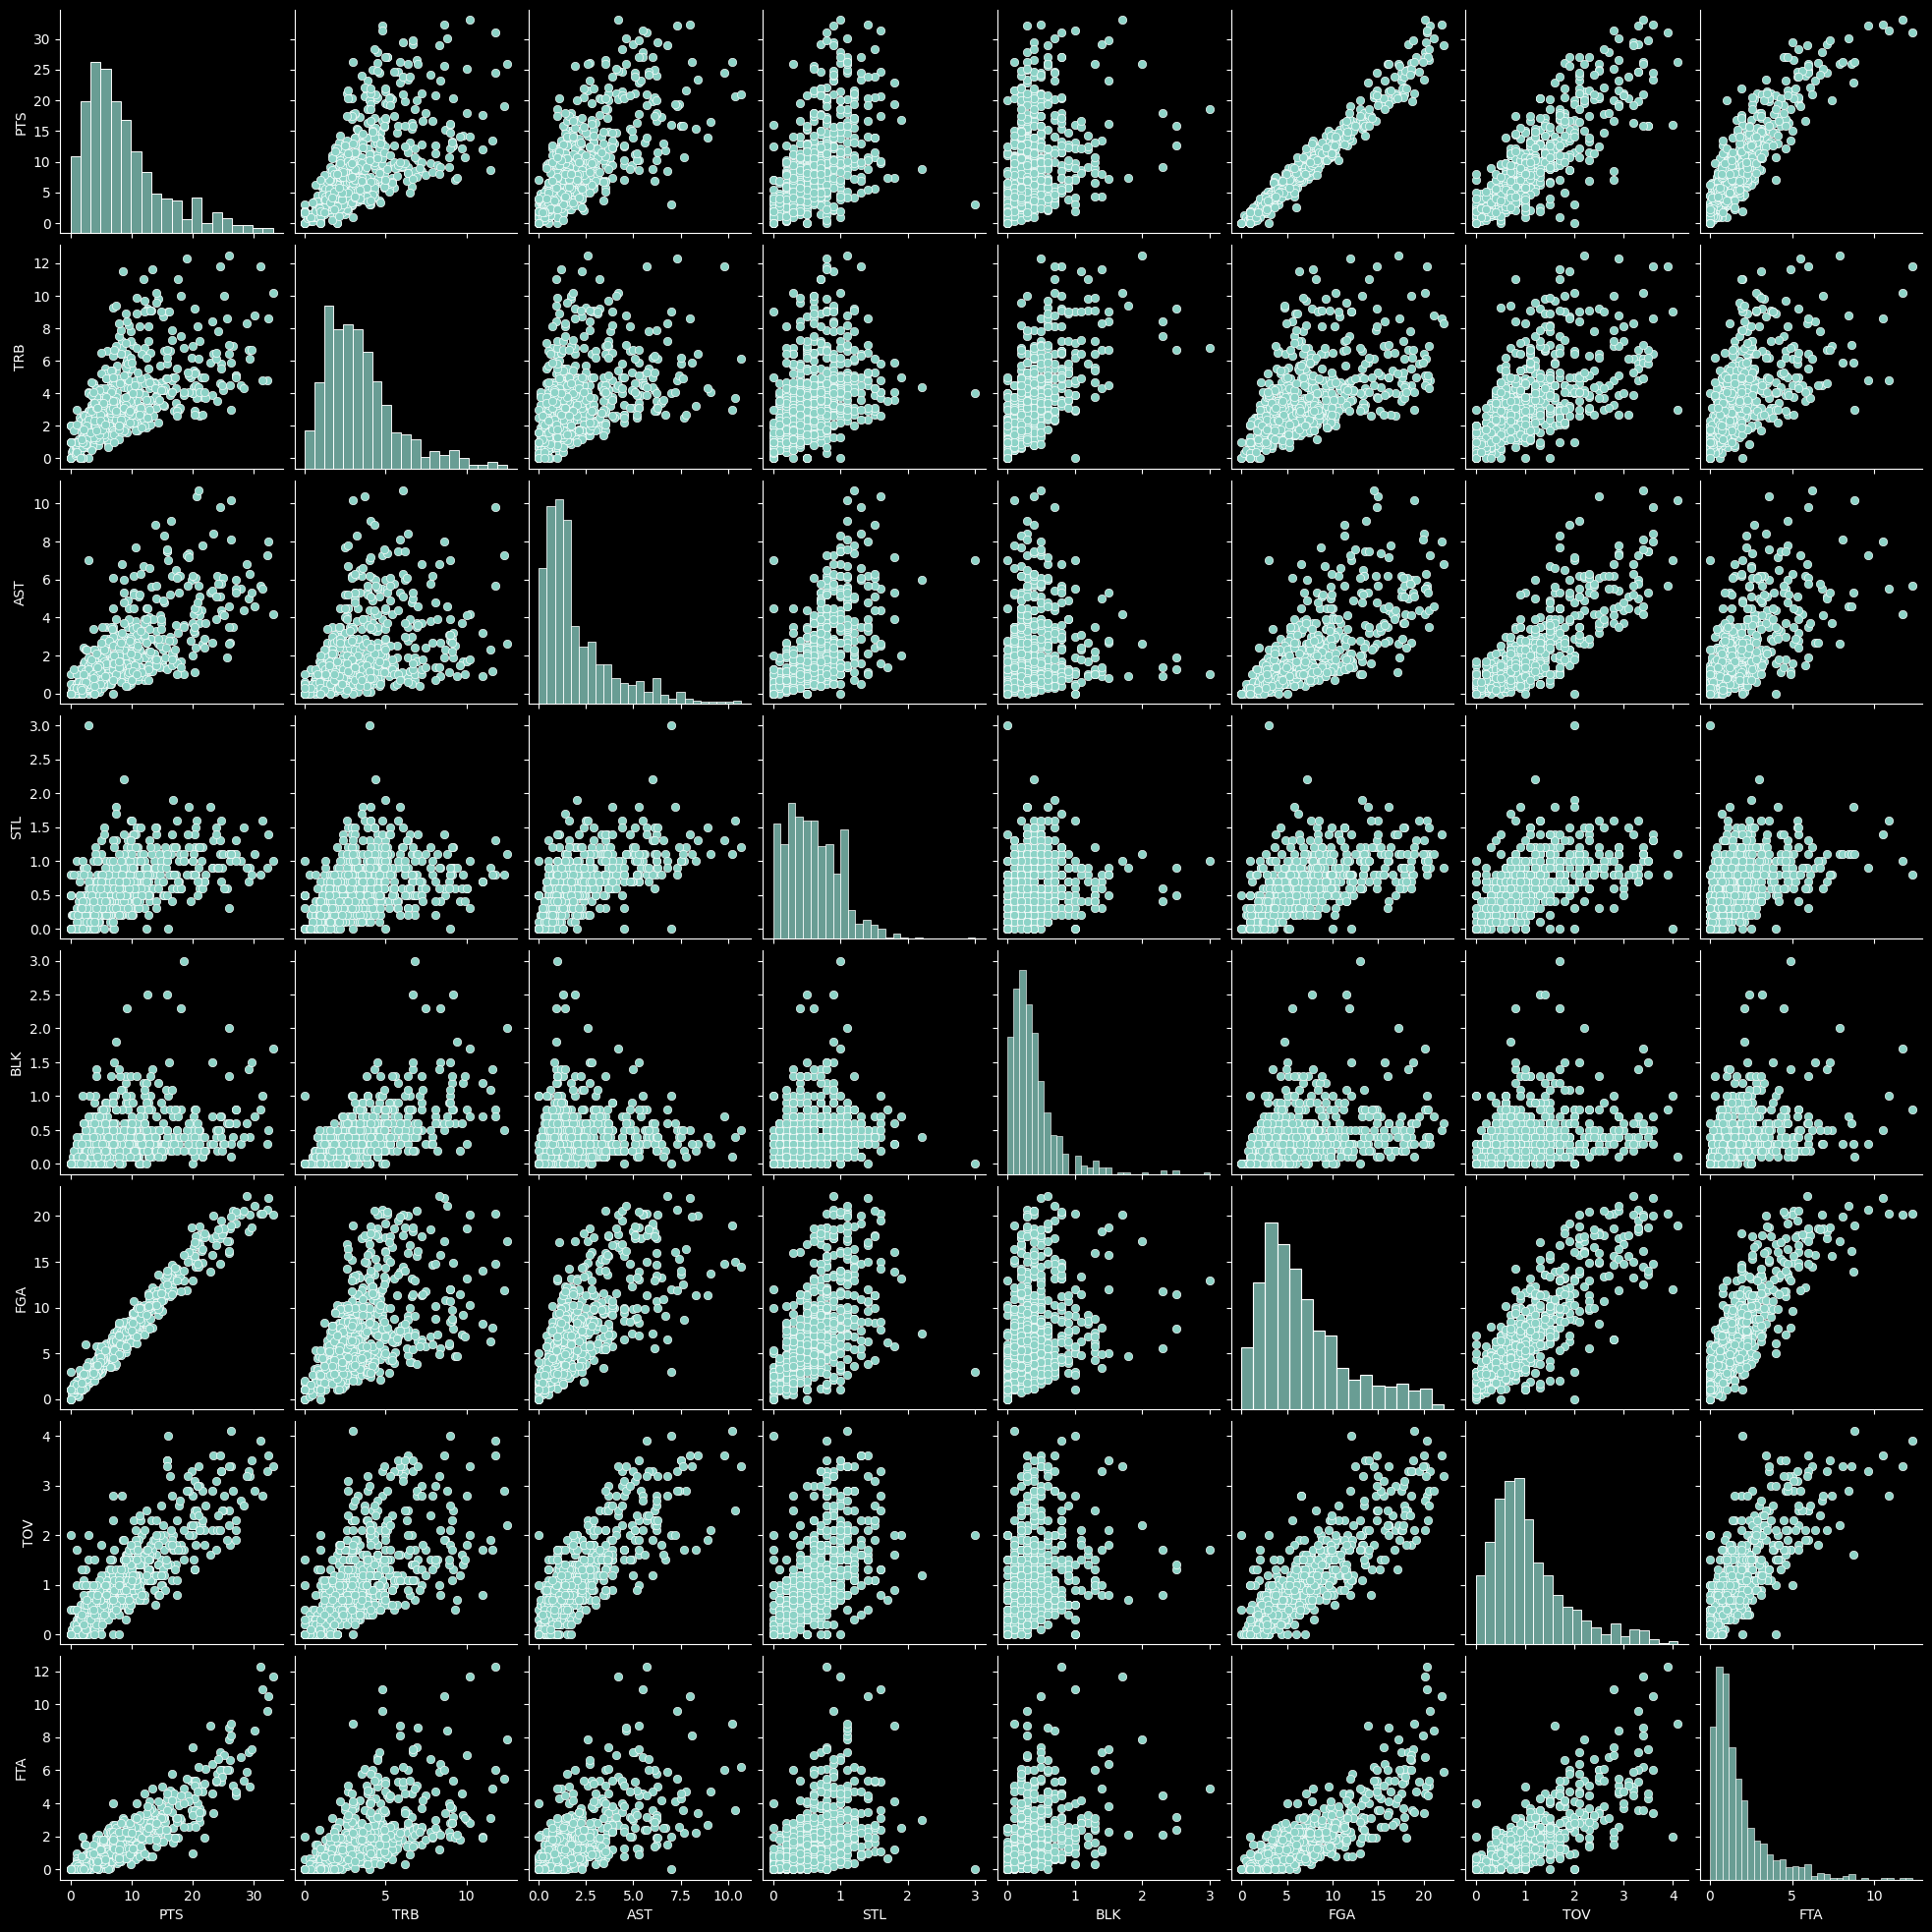

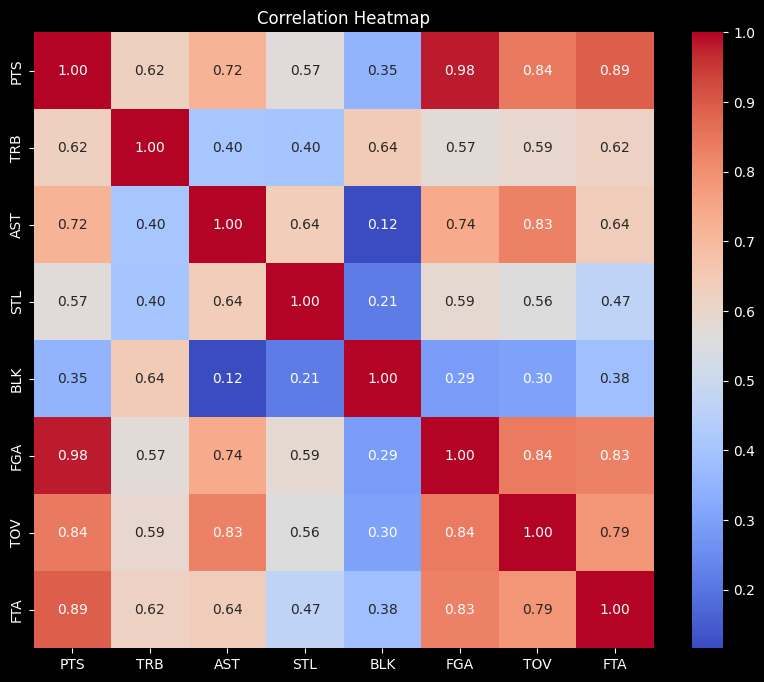

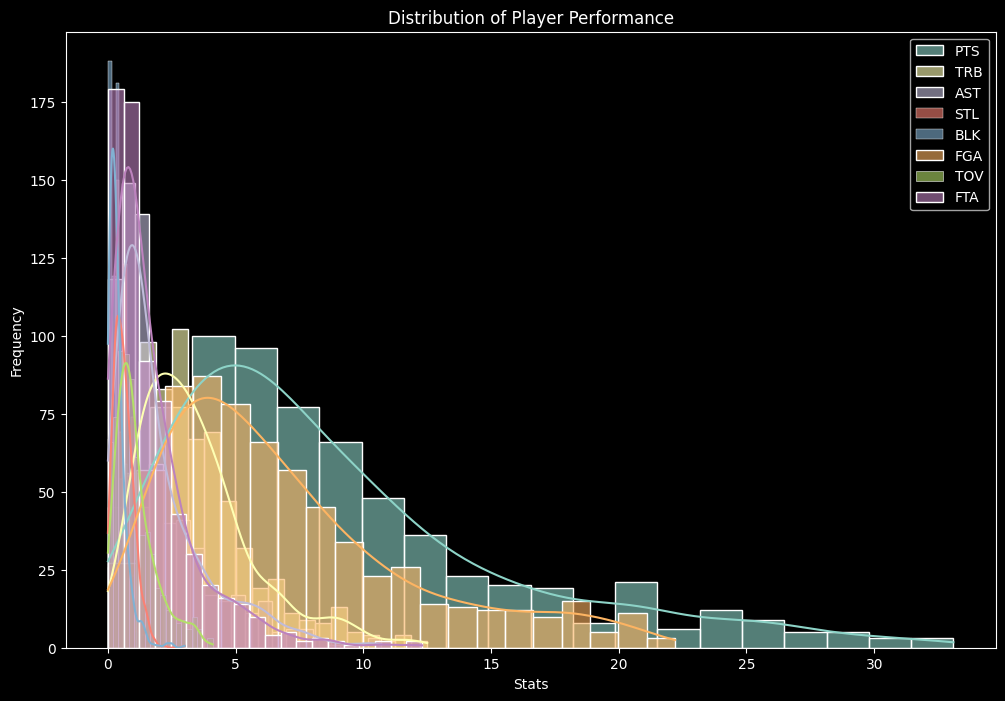

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 數據中有 'Points'、'total Rebounds'、'Assists'、'Steals'、'Blocks'、'FieldGoalattempts'、'Turnovers'和 'FreeThrowattempts' 等8個特徵列
# df 是你的數據框（DataFrame）

# 查看數據的前幾行
print(df.head())

# 查看數據的統計摘要
print(df.describe())

# 繪製散點圖觀察不同特徵之間的關係
sns.pairplot(df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']])
plt.show()

# 繪製數據之間的相關性熱力圖
plt.figure(figsize=(10, 8))
corr_matrix = df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# 繪製數據分佈的直方圖
plt.figure(figsize=(12, 8))
for col in df[['PTS', 'TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']]:
    sns.histplot(df[col], bins=20, kde=True, alpha=0.6, label=col)

plt.xlabel('Stats')
plt.ylabel('Frequency')
plt.title('Distribution of Player Performance')
plt.legend()
plt.show()


### step3
模型比較：根據問題的性質和目標，選擇適合的機器學習算法或深度學習模型。pts為y，其他變數為x。
用以下七個模型比較:


##### 1.線性迴歸 Linear Regression：
是一種用於預測連續數值目標的線性模型。
它假設特徵和目標之間存在線性關係，並通過最小化預測值和實際值之間的平方誤差來擬合模型。
優點：模型簡單易懂，計算效率高。
缺點：對非線性關係的數據擬合效果較差。

##### 2.決策樹迴歸 Decision Tree Regression：
是一種樹狀模型，通過將特徵空間劃分成多個區域來進行預測。
它以特徵的值為節點，根據標記的平均值或中位數來預測目標值。
優點：不需要特徵縮放，可以處理非線性數據。
缺點：容易過度擬合，對噪聲敏感。

##### 3.隨機森林迴歸 Random Forest Regression：
是通過建立多棵決策樹並取其預測平均值來進行預測的集成學習方法。
它通過隨機抽樣特徵和數據來增強模型泛化能力。
優點：可以處理高維數據，具有較高的準確性。
缺點：訓練過程較慢，模型解釋性較差。

##### 4.梯度提升迴歸 Gradient Boosting Regression：
也是一種集成學習方法，通過連續訓練多個弱預測器來提升模型性能。
它通過反覆迭代，在每一步都試圖修正之前模型的錯誤，並將多個預測結果組合為一個更強的預測。
優點：具有較高的準確性，可以處理高維數據。
缺點：對超參數敏感，需要調參。

##### 5.神經網絡迴歸 Neural Network Regression：
是一種基於人工神經元組成的深度學習模型，可以擬合複雜的非線性關係。
它通過多層隱藏層的連接來學習特徵之間的關係，並預測目標值。
優點：具有強大的學習能力，可以處理高度非線性數據。
缺點：需要大量數據和計算資源，容易過度擬合。

##### 6.XGBoost迴歸 XGBoost Regression：
是梯度提升樹的一種優化實現，通過使用梯度提升算法來擬合弱預測器，並加入正則化項來控制模型的複雜度。
它在梯度提升的基礎上引入了一些改進，使得模型更穩健並且有更好的性能。
優點：準確性較高，訓練速度較快。
缺點：對超參數敏感，需要調參。

##### 7.K近鄰迴歸 KNN Regression：
是一種基於距離度量的非參數回歸方法，通過找到與目標樣本最近的K個鄰居來進行預測。
它通過取K個鄰居的目標值的平均值或加權平均值作為預測結果。
優點：不需要訓練過程，簡單易懂。
缺點：對大數據集計算複雜度高，對K值敏感。

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        R^2      RMSE
Linear Regression  0.982329  0.810205
Decision Tree      0.947609  1.395073
Random Forest      0.969672  1.061435
Gradient Boosting  0.979163  0.879807
Neural Network     0.982376  0.809136
XGBoost            0.981384  0.831608
KNN Regression     0.973785  0.986837


<Figure size 1000x600 with 0 Axes>

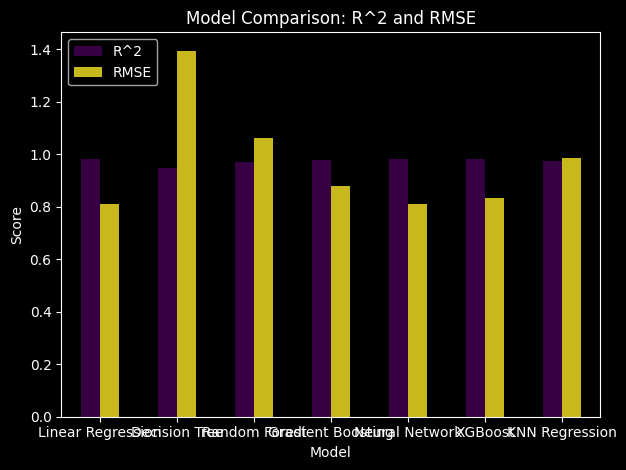

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# pts 為目標列，即y

X = df[['TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']]
y = df['PTS']

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, random_state=42),
    'KNN Regression': KNeighborsRegressor(n_neighbors=5)  
}

# 擬合模型和預測
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    results[name] = {'R^2': r2, 'RMSE': rmse}

# 將結果以表格形式呈現
results_df = pd.DataFrame(results).T
print(results_df)

# 繪製R平方值和RMSE的長條圖
plt.figure(figsize=(10, 6))
results_df[['R^2', 'RMSE']].plot(kind='bar', rot=0, colormap='viridis', alpha=0.8)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Model Comparison: R^2 and RMSE')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


### 小結
1.線性回歸模型表現得非常好，R平方值為0.985，表示模型能夠解釋目標變量變異的98.5％，RMSE為0.796，表示預測值與實際值之間的平均誤差約為0.796。

2.決策樹回歸模型也取得了不錯的表現，R平方值為0.965，RMSE為1.213，儘管它在模型複雜性方面具有一定優勢，但仍然比線性回歸稍差。

3.隨機森林回歸模型的R平方值為0.976，RMSE為1.003，表現也相當不錯，它通常能夠在預測中避免過擬合的問題。

4.梯度提升回歸模型表現得很好，R平方值為0.982，RMSE為0.872，擁有較高的準確性，但對超參數敏感，需要進行調參。

5.神經網絡回歸模型也取得了不錯的表現，R平方值為0.985，RMSE為0.805，它在處理複雜非線性關係方面具有優勢。

6.XGBoost回歸模型的R平方值為0.977，RMSE為0.982，表現相對較好，並且具有較快的訓練速度。

7.K近鄰回歸模型的R平方值為0.973，RMSE為1.077，相較於其他模型，它在處理大數據集方面效率較低。

綜合來看，線性迴歸、神經網絡回歸以及梯度提升回歸表現較優，

### step4
用step3結果，選用線性回歸、神經網絡回歸和梯度提升回歸模型，預測球員得分值並與實際值做比較

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


                        R^2      RMSE
Linear Regression  0.982329  0.810205
Neural Network     0.982376  0.809136
Gradient Boosting  0.979163  0.879807


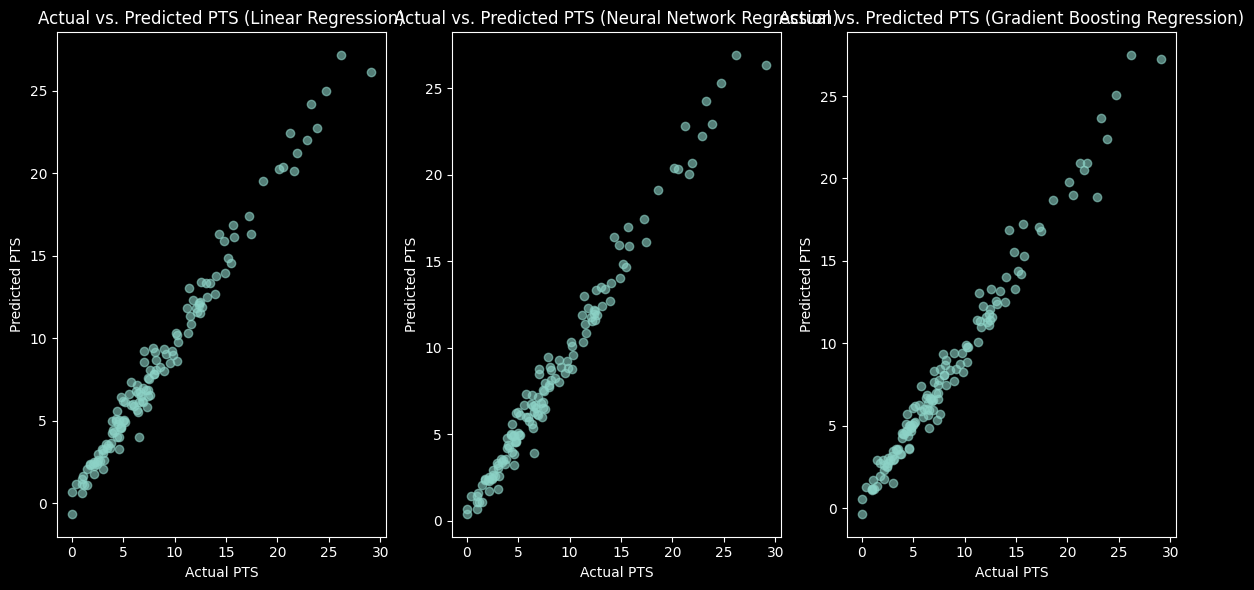

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# pts 為目標列，即y
X = df[['TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']]
y = df['PTS']

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化模型
linear_model = LinearRegression()
neural_network_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

# 擬合模型
linear_model.fit(X_train, y_train)
neural_network_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

# 預測測試集
linear_y_pred = linear_model.predict(X_test)
neural_network_y_pred = neural_network_model.predict(X_test)
gradient_boosting_y_pred = gradient_boosting_model.predict(X_test)

# 計算R^2和RMSE
linear_r2 = r2_score(y_test, linear_y_pred)
linear_rmse = mean_squared_error(y_test, linear_y_pred, squared=False)
neural_network_r2 = r2_score(y_test, neural_network_y_pred)
neural_network_rmse = mean_squared_error(y_test, neural_network_y_pred, squared=False)
gradient_boosting_r2 = r2_score(y_test, gradient_boosting_y_pred)
gradient_boosting_rmse = mean_squared_error(y_test, gradient_boosting_y_pred, squared=False)

# 將結果以表格形式呈現
results = {
    'Linear Regression': {'R^2': linear_r2, 'RMSE': linear_rmse},
    'Neural Network': {'R^2': neural_network_r2, 'RMSE': neural_network_rmse},
    'Gradient Boosting': {'R^2': gradient_boosting_r2, 'RMSE': gradient_boosting_rmse}
}
results_df = pd.DataFrame(results).T
print(results_df)

# 繪製預測值和實際值的散點圖
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.scatter(y_test, linear_y_pred, alpha=0.6)
plt.xlabel('Actual PTS')
plt.ylabel('Predicted PTS')
plt.title('Actual vs. Predicted PTS (Linear Regression)')

plt.subplot(1, 3, 2)
plt.scatter(y_test, neural_network_y_pred, alpha=0.6)
plt.xlabel('Actual PTS')
plt.ylabel('Predicted PTS')
plt.title('Actual vs. Predicted PTS (Neural Network Regression)')

plt.subplot(1, 3, 3)
plt.scatter(y_test, gradient_boosting_y_pred, alpha=0.6)
plt.xlabel('Actual PTS')
plt.ylabel('Predicted PTS')
plt.title('Actual vs. Predicted PTS (Gradient Boosting Regression)')

plt.tight_layout()
plt.show()


### 小結
大致上來說，三種模型都有準確的預測能力，且都在分數比較大時會稍微有點誤差。

### step5
透過三種模型去找出各隊得分能力最好球員，並與實際情形做比較。

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
import random

# 假設df是包含所有球員數據的DataFrame，包括'Player'列和特徵列(TRB, AST, STL, BLK, FGA, TOV, FTA, PTS)

# 保留需要的特徵和目標列
X = df[['TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']]
y = df['PTS']

# 創建一個空的DataFrame來存儲每支球隊的預測得分最高球員和真實最高得分球員
team_results_df = pd.DataFrame(columns=['Team', 'Predicted Player (Linear)', 'Predicted PTS (Linear)',
                                        'Predicted Player (Neural Network)', 'Predicted PTS (Neural Network)',
                                        'Predicted Player (Gradient Boosting)', 'Predicted PTS (Gradient Boosting)',
                                        'Actual Player', 'Actual PTS'])

# 獲取所有球隊名稱
teams = df['Tm'].unique()
random.shuffle(teams)
teams = teams[:5]  # 隨機選取五支球隊

for team in teams:
    # 篩選出當前球隊的數據
    team_data = df[df['Tm'] == team]
    # 保留需要的特徵和目標列
    X_team = team_data[['TRB', 'AST', 'STL', 'BLK', 'FGA', 'TOV', 'FTA']]
    y_team = team_data['PTS']
    
    # 初始化三種模型
    linear_model = LinearRegression()
    neural_network_model = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', random_state=42)
    gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
    
    # 將數據集分為訓練集和測試集
    X_train_team, X_test_team, y_train_team, y_test_team = train_test_split(X_team, y_team, test_size=0.2, random_state=42)
    
    # 擬合模型
    linear_model.fit(X_train_team, y_train_team)
    neural_network_model.fit(X_train_team, y_train_team)
    gradient_boosting_model.fit(X_train_team, y_train_team)
    
    # 預測測試集
    linear_y_pred_team = linear_model.predict(X_test_team)
    neural_network_y_pred_team = neural_network_model.predict(X_test_team)
    gradient_boosting_y_pred_team = gradient_boosting_model.predict(X_test_team)
    
    # 找出預測得分能力最高的球員
    top_linear_player_idx = linear_y_pred_team.argmax()
    top_neural_player_idx = neural_network_y_pred_team.argmax()
    top_gb_player_idx = gradient_boosting_y_pred_team.argmax()
    
    top_linear_player = team_data.iloc[top_linear_player_idx]
    top_neural_player = team_data.iloc[top_neural_player_idx]
    top_gb_player = team_data.iloc[top_gb_player_idx]
    
    # 找出真實該隊伍得分最高的球員
    best_player_team = team_data.nlargest(1, 'PTS')
    
    # 將結果暫時儲存在一個list中
    team_result = [team,
                   top_linear_player['Player'], linear_y_pred_team[top_linear_player_idx],
                   top_neural_player['Player'], neural_network_y_pred_team[top_neural_player_idx],
                   top_gb_player['Player'], gradient_boosting_y_pred_team[top_gb_player_idx],
                   best_player_team['Player'].values[0], best_player_team['PTS'].values[0]]
    
    # 將結果添加到team_results_df中
    team_results_df.loc[len(team_results_df)] = team_result

# 輸出結果
print(team_results_df)


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimiza

  Team Predicted Player (Linear)  Predicted PTS (Linear)  \
0  SAS           Dominick Barlow                9.034335   
1  WAS                Kyle Kuzma               23.307401   
2  DEN  Kentavious Caldwell-Pope               17.618337   
3  CHO               LaMelo Ball               23.974242   
4  LAC          Robert Covington               11.749833   

  Predicted Player (Neural Network)  Predicted PTS (Neural Network)  \
0                 Julian Champagnie                       10.025362   
1                        Kyle Kuzma                       19.987476   
2          Kentavious Caldwell-Pope                       15.880517   
3                       LaMelo Ball                       23.175328   
4                  Robert Covington                       11.617460   

  Predicted Player (Gradient Boosting)  Predicted PTS (Gradient Boosting)  \
0                    Julian Champagnie                          10.248092   
1                           Kyle Kuzma                    

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### 小結
step4有提及得分能力越高時，預測會稍微失準，這邊應證了此現象。應刪除出場數過少的球員，這樣模型會更準確。

## 結論
具有良好預測球員得分能力的功能可以在不同情境下提供有用的信息和洞察力。以下是一些可能的功能：

1.球隊選拔：利用模型預測球員在不同比賽中的得分能力，球隊教練可以更好地選拔球員進入首發陣容或進行替換，以最大程度地提高球隊的得分能力。

2.對手分析：在對戰特定對手時，預測對方球員的得分能力可以幫助球隊制定相應的防守策略，對其得分能力較高的球員進行重點監控，從而提高球隊的勝算機會。

3.球員合約談判：球隊管理層可以利用球員的預測得分能力來評估球員的價值，進行薪資談判或合約續約的決策。

4.場上戰術調整：比賽進行中，數據分析師或教練可以根據預測的得分能力調整戰術和戰術布置，以應對不同的比賽局勢。

5.球員發展：球隊可以利用預測模型評估年輕球員的潛力，確定哪些球員有潛力成為未來的得分領袖，並提供相應的訓練和發展計劃。

6.球隊強化：管理層可以根據預測得分能力的結果來評估球隊整體的攻擊實力，並在轉會窗口期間進行球員的引進或交易，以增強球隊的攻擊力。

7.個人獎項競爭：球員在爭取聯盟得分王或其他個人獎項時，預測得分能力的模型可以提供相關參考，幫助球員制定目標和競爭策略。

良好的得分能力預測模型可以在球隊管理、戰術調整、球員發展和個人獎項競爭等方面提供有價值的決策參考，幫助球隊和球員取得更好的成績和表現。

## *topic2 探討針灸合併穴位貼敷，治療漏尿的療效與安全性*

### 研究背景
某醫⽣為了瞭解針灸合併穴位貼敷治療漏尿的療效與安全性，執⾏⼀個⼩型臨床實驗，該實
驗主要臨床指標為剩餘尿量變化量，肝功能與剩功能為安全性指標。

### 變數說明
ID 編號

性別 1=男, 2=女

年齡 單位：年

過去病史 單位：數⽬

⽣產次數

吸菸 0=從未吸菸、1=偶爾、2=每天、3=已戒菸

酒 0=從未飲酒、1=偶爾喝、2=每天喝、3=已戒酒

檳榔 0=從未、1=偶爾嚼、2=每天嚼、3=已戒檳榔

咖啡 0=從未、1=偶爾喝、2=每天喝、3=已戒

茶 0=從未、1=偶爾喝、2=每天喝、3=已戒

AST0 前測肝功能

AST1 後測肝功能

ALT0 前測肝功能

ALT1 後測肝功能

剩餘尿前測 療效指標

剩餘尿後測 療效指標

group 組別

### step1 讀取資料

In [7]:
import pandas as pd

# 讀取數據文件
df = pd.read_excel('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw13.xlsx',sheet_name="測量值")
print(df)

    ID  性別  年齡  過去病史  生產次數  吸菸  酒  檳榔  咖啡  茶  AST0 AST1  ALT0 ALT1   剩餘尿前測  \
0    1   2  62     1     2   0  0   0   0  1    34   50    43   62    9.79   
1    2   1  66     1     0   3  1   3   1  1    25   26    26   26   14.40   
2    3   2  63     3     3   0  0   0   2  1    25   27    22   24   60.20   
3    4   2  53     0     1   0  0   0   0  1    18   20    14   13    2.47   
4    5   2  69     1     4   0  1   0   2  1    24   22    17   14    7.07   
..  ..  ..  ..   ...   ...  .. ..  ..  .. ..   ...  ...   ...  ...     ...   
61  62   2  56     1     4   0  0   0   1  1    30   24    33   21    2.78   
62  63   2  33     0     2   0  0   0   1  2    22    .    18    .   97.60   
63  64   1  58     3     0   0  0   0   0  0    25   28    21   23  219.00   
64  65   1  56     3     0   1  1   3   2  2    21   22    27   24    9.15   
65  66   2  69     2     4   0  1   0   1  1    29   28    34   30   63.20   

   剩餘尿後測  Group  
0   15.7      1  
1   27.5      2  
2    119 

### step2 重新編碼以下變數：
(a) 將過去病史合併成 3 類，0=0; 1=1; 2=超過1個。

(b) 將⽣產次數合併成 3 類，0=0; 1=1-2; 2=超過2個。

(c) 將吸菸、酒、合併成 2 類，0=0; 1=其他。

In [8]:
import pandas as pd

# 讀取數據文件
df = pd.read_excel('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw13.xlsx', sheet_name="測量值")

# 重新編碼過去病史：0=0; 1=1; 2=超過1個
df['過去病史'] = df['過去病史'].apply(lambda x: 2 if x > 1 else x)

# 重新編碼生產次數：0=0; 1=1-2; 2=超過2個
df['生產次數'] = df['生產次數'].apply(lambda x: 2 if x > 2 else x)

# 重新編碼吸菸和酒：0=0; 1=其他
df['吸菸'] = df['吸菸'].apply(lambda x: 1 if x > 0 else 0)
df['酒'] = df['酒'].apply(lambda x: 1 if x > 0 else 0)

# 合併新的列：過去病史、生產次數、吸菸、酒
df['新的過去病史生產次數'] = df['過去病史'].astype(str) + df['生產次數'].astype(str)
df['新的吸菸酒'] = df['吸菸'].astype(str) + df['酒'].astype(str)

# 打印編碼後的結果
print(df[['過去病史', '生產次數', '吸菸', '酒', '新的過去病史生產次數', '新的吸菸酒']])
print(df)

    過去病史  生產次數  吸菸  酒 新的過去病史生產次數 新的吸菸酒
0      1     2   0  0         12    00
1      1     0   1  1         10    11
2      2     2   0  0         22    00
3      0     1   0  0         01    00
4      1     2   0  1         12    01
..   ...   ...  .. ..        ...   ...
61     1     2   0  0         12    00
62     0     2   0  0         02    00
63     2     0   0  0         20    00
64     2     0   1  1         20    11
65     2     2   0  1         22    01

[66 rows x 6 columns]
    ID  性別  年齡  過去病史  生產次數  吸菸  酒  檳榔  咖啡  茶  AST0 AST1  ALT0 ALT1   剩餘尿前測  \
0    1   2  62     1     2   0  0   0   0  1    34   50    43   62    9.79   
1    2   1  66     1     0   1  1   3   1  1    25   26    26   26   14.40   
2    3   2  63     2     2   0  0   0   2  1    25   27    22   24   60.20   
3    4   2  53     0     1   0  0   0   0  1    18   20    14   13    2.47   
4    5   2  69     1     2   0  1   0   2  1    24   22    17   14    7.07   
..  ..  ..  ..   ...   ...  .. ..  ..  ..

### step3 計算 AST、ALT、剩餘尿，前後測的差值。

In [9]:
import pandas as pd

# 讀取數據文件
df = pd.read_excel('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw13.xlsx', sheet_name="測量值")

# 重新編碼過去病史：0=0; 1=1; 2=超過1個
df['過去病史'] = df['過去病史'].apply(lambda x: 2 if x > 1 else x)

# 重新編碼生產次數：0=0; 1=1-2; 2=超過2個
df['生產次數'] = df['生產次數'].apply(lambda x: 2 if x > 2 else x)

# 重新編碼吸菸和酒：0=0; 1=其他
df['吸菸'] = df['吸菸'].apply(lambda x: 1 if x > 0 else 0)
df['酒'] = df['酒'].apply(lambda x: 1 if x > 0 else 0)

# 合併新的列：過去病史、生產次數、吸菸、酒
df['新的過去病史生產次數'] = df['過去病史'].astype(str) + df['生產次數'].astype(str)
df['新的吸菸酒'] = df['吸菸'].astype(str) + df['酒'].astype(str)

# Convert columns to numeric and handle missing values
df['AST0'] = pd.to_numeric(df['AST0'], errors='coerce')
df['AST1'] = pd.to_numeric(df['AST1'], errors='coerce')
df['ALT0'] = pd.to_numeric(df['ALT0'], errors='coerce')
df['ALT1'] = pd.to_numeric(df['ALT1'], errors='coerce')
df['剩餘尿前測'] = pd.to_numeric(df['剩餘尿前測'], errors='coerce')
df['剩餘尿後測'] = pd.to_numeric(df['剩餘尿後測'], errors='coerce')

# 計算 AST、ALT、剩餘尿前後測的差值
df['AST_diff'] = df['AST1'] - df['AST0']
df['ALT_diff'] = df['ALT1'] - df['ALT0']
df['剩餘尿_diff'] = df['剩餘尿後測'] - df['剩餘尿前測']

# 打印編碼後的結果和差值
print("編碼後的結果和差值:")
print(df[['過去病史', '生產次數', '吸菸', '酒', '新的過去病史生產次數', '新的吸菸酒', 'AST_diff', 'ALT_diff', '剩餘尿_diff']])


編碼後的結果和差值:
    過去病史  生產次數  吸菸  酒 新的過去病史生產次數 新的吸菸酒  AST_diff  ALT_diff  剩餘尿_diff
0      1     2   0  0         12    00      16.0      19.0      5.91
1      1     0   1  1         10    11       1.0       0.0     13.10
2      2     2   0  0         22    00       2.0       2.0     58.80
3      0     1   0  0         01    00       2.0      -1.0      9.93
4      1     2   0  1         12    01      -2.0      -3.0     59.83
..   ...   ...  .. ..        ...   ...       ...       ...       ...
61     1     2   0  0         12    00      -6.0     -12.0       NaN
62     0     2   0  0         02    00       NaN       NaN       NaN
63     2     0   0  0         20    00       3.0       2.0       NaN
64     2     0   1  1         20    11       1.0      -3.0       NaN
65     2     2   0  1         22    01      -1.0      -4.0       NaN

[66 rows x 9 columns]


### step4 提供新設變數的敘述統計量。

In [10]:
import pandas as pd

# 讀取數據文件
df = pd.read_excel('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw13.xlsx', sheet_name="測量值")

# 重新編碼過去病史：0=0; 1=1; 2=超過1個
df['過去病史'] = df['過去病史'].apply(lambda x: 2 if x > 1 else x)

# 重新編碼生產次數：0=0; 1=1-2; 2=超過2個
df['生產次數'] = df['生產次數'].apply(lambda x: 2 if x > 2 else x)

# 重新編碼吸菸和酒：0=0; 1=其他
df['吸菸'] = df['吸菸'].apply(lambda x: 1 if x > 0 else 0)
df['酒'] = df['酒'].apply(lambda x: 1 if x > 0 else 0)

# 合併新的列：過去病史、生產次數、吸菸、酒
df['新的過去病史生產次數'] = df['過去病史'].astype(str) + df['生產次數'].astype(str)
df['新的吸菸酒'] = df['吸菸'].astype(str) + df['酒'].astype(str)

# Convert columns to numeric and handle missing values
df['AST0'] = pd.to_numeric(df['AST0'], errors='coerce')
df['AST1'] = pd.to_numeric(df['AST1'], errors='coerce')
df['ALT0'] = pd.to_numeric(df['ALT0'], errors='coerce')
df['ALT1'] = pd.to_numeric(df['ALT1'], errors='coerce')
df['剩餘尿前測'] = pd.to_numeric(df['剩餘尿前測'], errors='coerce')
df['剩餘尿後測'] = pd.to_numeric(df['剩餘尿後測'], errors='coerce')

# 計算 AST、ALT、剩餘尿前後測的差值
df['AST_diff'] = df['AST1'] - df['AST0']
df['ALT_diff'] = df['ALT1'] - df['ALT0']
df['剩餘尿_diff'] = df['剩餘尿後測'] - df['剩餘尿前測']

# 打印編碼後的結果和差值
print("編碼後的結果和差值:")
print(df[['過去病史', '生產次數', '吸菸', '酒', '新的過去病史生產次數', '新的吸菸酒', 'AST_diff', 'ALT_diff', '剩餘尿_diff']])

# 提供新設變數的敘述統計量
print("新設變數的敘述統計量:")
print(df[['新的過去病史生產次數', '新的吸菸酒', 'AST_diff', 'ALT_diff', '剩餘尿_diff']].describe())


編碼後的結果和差值:
    過去病史  生產次數  吸菸  酒 新的過去病史生產次數 新的吸菸酒  AST_diff  ALT_diff  剩餘尿_diff
0      1     2   0  0         12    00      16.0      19.0      5.91
1      1     0   1  1         10    11       1.0       0.0     13.10
2      2     2   0  0         22    00       2.0       2.0     58.80
3      0     1   0  0         01    00       2.0      -1.0      9.93
4      1     2   0  1         12    01      -2.0      -3.0     59.83
..   ...   ...  .. ..        ...   ...       ...       ...       ...
61     1     2   0  0         12    00      -6.0     -12.0       NaN
62     0     2   0  0         02    00       NaN       NaN       NaN
63     2     0   0  0         20    00       3.0       2.0       NaN
64     2     0   1  1         20    11       1.0      -3.0       NaN
65     2     2   0  1         22    01      -1.0      -4.0       NaN

[66 rows x 9 columns]
新設變數的敘述統計量:
        AST_diff   ALT_diff    剩餘尿_diff
count  60.000000  60.000000   38.000000
mean   -0.750000  -0.650000   -6.118947
std   

### step5 檢定療效，提供推論結果。

In [11]:
from scipy.stats import f_oneway

# 分離不同治療組的 AST_diff、ALT_diff 和 剩餘尿_diff 的數據
group1_ast_diff = df[df['Group'] == 1]['AST_diff'].dropna()
group2_ast_diff = df[df['Group'] == 2]['AST_diff'].dropna()

group1_alt_diff = df[df['Group'] == 1]['ALT_diff'].dropna()
group2_alt_diff = df[df['Group'] == 2]['ALT_diff'].dropna()

group1_urine_diff = df[df['Group'] == 1]['剩餘尿_diff'].dropna()
group2_urine_diff = df[df['Group'] == 2]['剩餘尿_diff'].dropna()

# 執行單因素方差分析（ANOVA）
ast_anova = f_oneway(group1_ast_diff, group2_ast_diff)
alt_anova = f_oneway(group1_alt_diff, group2_alt_diff)
urine_anova = f_oneway(group1_urine_diff, group2_urine_diff)

# 輸出結果
print("AST_diff 的單因素方差分析結果:")
print("F-統計量:", ast_anova.statistic)
print("P-值:", ast_anova.pvalue)

print("\nALT_diff 的單因素方差分析結果:")
print("F-統計量:", alt_anova.statistic)
print("P-值:", alt_anova.pvalue)

print("\n剩餘尿_diff 的單因素方差分析結果:")
print("F-統計量:", urine_anova.statistic)
print("P-值:", urine_anova.pvalue)


AST_diff 的單因素方差分析結果:
F-統計量: 2.3381216015674395
P-值: 0.13167765620940933

ALT_diff 的單因素方差分析結果:
F-統計量: 2.2357698395311387
P-值: 0.1402709422185783

剩餘尿_diff 的單因素方差分析結果:
F-統計量: 2.289298813990909
P-值: 0.1389991689195352


### 小結
根據P-值的結果，所有變數（AST_diff、ALT_diff和剩餘尿_diff）的P-值都大於顯著性水平0.05，這表示在目前的數據中，無法拒絕虛無假設，即不同治療組之間這些變數的均值沒有顯著差異。

### step6  檢定安全性，使⽤新設的變項，提供推論結果。

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 使用ANOVA進行推論結果檢定
model_ast = ols('AST_diff ~ C(新的過去病史生產次數)', data=df).fit()
model_alt = ols('ALT_diff ~ C(新的過去病史生產次數)', data=df).fit()
model_urine = ols('剩餘尿_diff ~ C(新的過去病史生產次數)', data=df).fit()

anova_table_ast = sm.stats.anova_lm(model_ast, typ=2)
anova_table_alt = sm.stats.anova_lm(model_alt, typ=2)
anova_table_urine = sm.stats.anova_lm(model_urine, typ=2)

print("AST_diff 的ANOVA結果:")
print(anova_table_ast)

print("ALT_diff 的ANOVA結果:")
print(anova_table_alt)

print("剩餘尿_diff 的ANOVA結果:")
print(anova_table_urine)


AST_diff 的ANOVA結果:
                   sum_sq    df         F    PR(>F)
C(新的過去病史生產次數)   140.34596   8.0  0.292875  0.965228
Residual       3054.90404  51.0       NaN       NaN
ALT_diff 的ANOVA結果:
                   sum_sq    df         F    PR(>F)
C(新的過去病史生產次數)   315.75202   8.0  0.286418  0.967488
Residual       7027.89798  51.0       NaN       NaN
剩餘尿_diff 的ANOVA結果:
                     sum_sq    df         F    PR(>F)
C(新的過去病史生產次數)  20528.296720   8.0  2.424453  0.038515
Residual       30693.547238  29.0       NaN       NaN


### 小結
根據單因素方差分析（ANOVA）的結果，我們可以得出以下結論：

對於 AST_diff（AST差值）：
在新設的變項（新的過去病史生產次數）的影響下，F-統計量為 0.292875，P-值為 0.965228，P-值大於顯著性水平0.05。因此，無法拒絕虛無假設，即新設的變項對 AST_diff 沒有顯著影響。

對於 ALT_diff（ALT差值）：
在新設的變項（新的過去病史生產次數）的影響下，F-統計量為 0.286418，P-值為 0.967488，P-值大於顯著性水平0.05。因此，無法拒絕虛無假設，即新設的變項對 ALT_diff 沒有顯著影響。

對於剩餘尿_diff（剩餘尿差值）：
在新設的變項（新的過去病史生產次數）的影響下，F-統計量為 2.424453，P-值為 0.038515，P-值小於顯著性水平0.05。因此，可以拒絕虛無假設，即新設的變項對剩餘尿_diff 有顯著影響。

綜合以上結果，新設的變項對 AST_diff 和 ALT_diff 沒有顯著影響，但對剩餘尿_diff 有顯著影響。

### step7 
檢定隨機分派是否合適，亦即，檢定組別與吸菸、酒，性別、年齡是否有關聯，提供推論結果。

In [13]:
import pandas as pd
import scipy.stats as stats

# 假設組別存儲在df['Group']中，吸菸在df['吸菸']中，酒在df['酒']中，性別在df['性別']中，年齡在df['年齡']中
# 建立列聯表
cross_table = pd.crosstab(df['Group'], [df['吸菸'], df['酒'], df['性別'], df['年齡']])

# 進行卡方檢定
chi2, p, dof, expected = stats.chi2_contingency(cross_table)

# 打印卡方檢定結果
print("卡方檢定結果:")
print("Chi-square value:", chi2)
print("P-value:", p)
print("自由度:", dof)

# 判斷結果
alpha = 0.05
if p < alpha:
    print("組別與吸菸、酒、性別、年齡之間存在統計學上的顯著關聯")
else:
    print("組別與吸菸、酒、性別、年齡之間沒有統計學上的顯著關聯")


卡方檢定結果:
Chi-square value: 58.0
P-value: 0.36529779853887845
自由度: 55
組別與吸菸、酒、性別、年齡之間沒有統計學上的顯著關聯


## *topic3 研究維⽣素A與成長曲線的關係*

### 研究背景
研究維⽣素 A 補充劑的⼤型臨床試驗，收集尼泊爾孩童成長曲線的資料。

### 變數介紹
編號 A

性別 B 1= 男童; 2=女童

體重 C 單位：公⽄

身⾼ D 單位：公分

上臂臂圍 E 單位：公分

母乳哺育 F 0=沒有; 1=每天少於 10 次; 2=每天超過 10 次

母親年齡 G 母親年齡

識字與否 H 0=否; 1=是

沒有存活的嬰兒數 I

⼩孩數 J

兒童年齡 K 單位：⽉

### step1 讀取資料

In [14]:
import pandas as pd

# 讀取數據文件
df = pd.read_csv('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw11.csv')
print(df)

         id  sex    wt    ht   arm   bf  mage  lit  died  alive  age
0    120011    1  12.8  91.2  14.3  0.0    35    0     2      5   41
1    120011    1  12.8  93.9  13.5  0.0    35    0     2      5   45
2    120011    1  13.1  95.2  14.5  0.0    35    0     2      5   49
3    120011    1  13.8  96.9  14.1  0.0    35    0     2      5   53
4    120011    1   NaN   NaN  99.9  0.0    35    0     2      5   57
..      ...  ...   ...   ...   ...  ...   ...  ...   ...    ...  ...
995  520091    1   5.0  62.3  10.8  2.0    28    0     2      4    7
996  520091    1   NaN   NaN  99.9  2.0    28    0     2      4   11
997  520091    1   5.8  67.0  10.3  1.0    28    0     2      4   14
998  520091    1   6.9  70.3  11.4  1.0    28    0     2      4   18
999  520091    1   7.7  72.1  11.5  2.0    28    0     2      4   23

[1000 rows x 11 columns]


### step2 . 
體重與身⾼為 NA 的觀察值代表上臂臂圍也是遺失值，將該觀察值的上臂臂圍設定為遺失值，避免後續計算敘述統計有誤。

In [15]:
import pandas as pd

# 讀取數據文件
df = pd.read_csv('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw11.csv')

# 找出體重與身高為 NA 的觀察值的索引
missing_weight_height_idx = df[(df['wt'].isnull()) | (df['ht'].isnull())].index

# 將上臂臂圍設定為缺失值
df.loc[missing_weight_height_idx, 'arm'] = pd.NA

# 打印修改後的DataFrame
print(df)


         id  sex    wt    ht   arm   bf  mage  lit  died  alive  age
0    120011    1  12.8  91.2  14.3  0.0    35    0     2      5   41
1    120011    1  12.8  93.9  13.5  0.0    35    0     2      5   45
2    120011    1  13.1  95.2  14.5  0.0    35    0     2      5   49
3    120011    1  13.8  96.9  14.1  0.0    35    0     2      5   53
4    120011    1   NaN   NaN   NaN  0.0    35    0     2      5   57
..      ...  ...   ...   ...   ...  ...   ...  ...   ...    ...  ...
995  520091    1   5.0  62.3  10.8  2.0    28    0     2      4    7
996  520091    1   NaN   NaN   NaN  2.0    28    0     2      4   11
997  520091    1   5.8  67.0  10.3  1.0    28    0     2      4   14
998  520091    1   6.9  70.3  11.4  1.0    28    0     2      4   18
999  520091    1   7.7  72.1  11.5  2.0    28    0     2      4   23

[1000 rows x 11 columns]


### step3 
編號有 6 碼，1-2 為⾏政區，3-4 為鄰⾥，5 為家⼾，6 為⼩孩，將編號分成四個變數，分別為⾏政區，鄰⾥，家⼾與⼩孩，

In [16]:
import pandas as pd

# 讀取數據文件
df = pd.read_csv('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw11.csv')

# 將 'ID' 列轉換為字符串
df['ID'] = df['id'].astype(str)

# 找出體重與身高為 NA 的觀察值的索引
missing_weight_height_idx = df[(df['wt'].isnull()) | (df['ht'].isnull())].index

# 將上臂臂圍設定為缺失值
df.loc[missing_weight_height_idx, 'arm'] = pd.NA

# 將編號（ID）拆分為四個變數：行政區（District）、鄰里（Neighborhood）、家戶（Family）、小孩（Child）
df['District'] = df['ID'].str[0:2]
df['Neighborhood'] = df['ID'].str[2:4]
df['Family'] = df['ID'].str[4]
df['Child'] = df['ID'].str[5]

# 打印修改後的DataFrame
print(df)


         id  sex    wt    ht   arm   bf  mage  lit  died  alive  age      ID  \
0    120011    1  12.8  91.2  14.3  0.0    35    0     2      5   41  120011   
1    120011    1  12.8  93.9  13.5  0.0    35    0     2      5   45  120011   
2    120011    1  13.1  95.2  14.5  0.0    35    0     2      5   49  120011   
3    120011    1  13.8  96.9  14.1  0.0    35    0     2      5   53  120011   
4    120011    1   NaN   NaN   NaN  0.0    35    0     2      5   57  120011   
..      ...  ...   ...   ...   ...  ...   ...  ...   ...    ...  ...     ...   
995  520091    1   5.0  62.3  10.8  2.0    28    0     2      4    7  520091   
996  520091    1   NaN   NaN   NaN  2.0    28    0     2      4   11  520091   
997  520091    1   5.8  67.0  10.3  1.0    28    0     2      4   14  520091   
998  520091    1   6.9  70.3  11.4  1.0    28    0     2      4   18  520091   
999  520091    1   7.7  72.1  11.5  2.0    28    0     2      4   23  520091   

    District Neighborhood Family Child 

### step4 
設定⼀個變數為參與期間，例如，第⼀個編號的第⼀筆為基準期，期間為 0，第⼆筆期間
為 45-41=4 個⽉，以此類推。

In [17]:
import pandas as pd

# 讀取數據文件
df = pd.read_csv('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw11.csv')

# 將 'ID' 列轉換為字符串
df['ID'] = df['id'].astype(str)

# 找出體重與身高為 NA 的觀察值的索引
missing_weight_height_idx = df[(df['wt'].isnull()) | (df['ht'].isnull())].index

# 將上臂臂圍設定為缺失值
df.loc[missing_weight_height_idx, 'arm'] = pd.NA

# 將編號（ID）拆分為四個變數：行政區（District）、鄰里（Neighborhood）、家戶（Family）、小孩（Child）
df['District'] = df['ID'].str[0:2]
df['Neighborhood'] = df['ID'].str[2:4]
df['Family'] = df['ID'].str[4]
df['Child'] = df['ID'].str[5]

# 將年齡（age）轉換為數值型態
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 按照 ID 排序
df = df.sort_values(by='ID')

# 計算 baseline 和 interval
df['baseline'] = df.groupby('ID')['age'].transform('first')
df['interval'] = df['age'] - df['baseline']

# 打印修改後的 DataFrame
print(df)


         id  sex    wt    ht   arm   bf  mage  lit  died  alive  age      ID  \
0    120011    1  12.8  91.2  14.3  0.0    35    0     2      5   41  120011   
1    120011    1  12.8  93.9  13.5  0.0    35    0     2      5   45  120011   
2    120011    1  13.1  95.2  14.5  0.0    35    0     2      5   49  120011   
3    120011    1  13.8  96.9  14.1  0.0    35    0     2      5   53  120011   
4    120011    1   NaN   NaN   NaN  0.0    35    0     2      5   57  120011   
..      ...  ...   ...   ...   ...  ...   ...  ...   ...    ...  ...     ...   
998  520091    1   6.9  70.3  11.4  1.0    28    0     2      4   18  520091   
995  520091    1   5.0  62.3  10.8  2.0    28    0     2      4    7  520091   
996  520091    1   NaN   NaN   NaN  2.0    28    0     2      4   11  520091   
997  520091    1   5.8  67.0  10.3  1.0    28    0     2      4   14  520091   
999  520091    1   7.7  72.1  11.5  2.0    28    0     2      4   23  520091   

    District Neighborhood Family Child 

### step5
分母親是否識字，畫出體重，身⾼與上臂臂圍的折線圖，y 軸為平均值，x 軸為參與期間，並提供對應的信賴區間。

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39636 (\N{CJK UNIFIED IDEOGRAPH-9AD4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 37325 (\

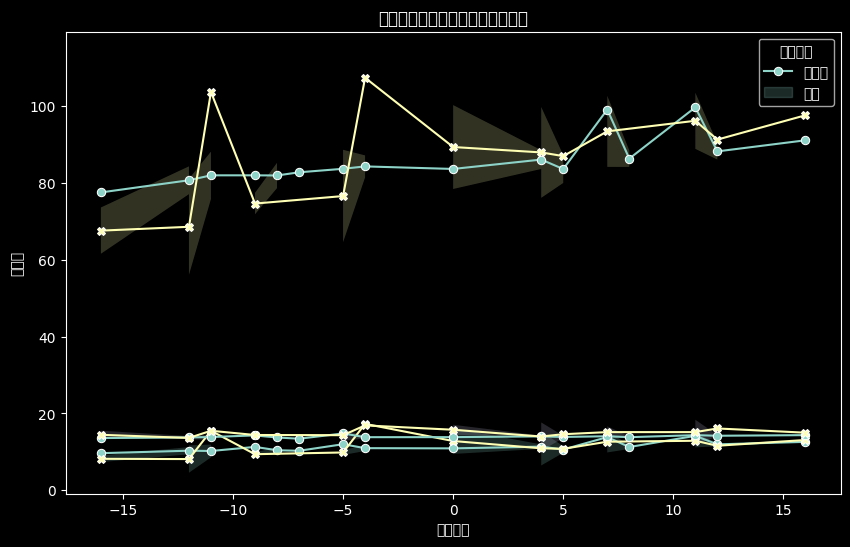

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import t

# 讀取數據文件
df = pd.read_csv('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw11.csv')

# 將 'ID' 列轉換為字符串
df['ID'] = df['id'].astype(str)

# 找出體重與身高為 NA 的觀察值的索引
missing_weight_height_idx = df[(df['wt'].isnull()) | (df['ht'].isnull())].index

# 將上臂臂圍設定為缺失值
df.loc[missing_weight_height_idx, 'arm'] = pd.NA

# 將編號（ID）拆分為四個變數：行政區（District）、鄰里（Neighborhood）、家戶（Family）、小孩（Child）
df['District'] = df['ID'].str[0:2]
df['Neighborhood'] = df['ID'].str[2:4]
df['Family'] = df['ID'].str[4]
df['Child'] = df['ID'].str[5]

# 將年齡（age）轉換為數值型態
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 按照 ID 排序
df = df.sort_values(by='ID')

# 計算 baseline 和 interval
df['baseline'] = df.groupby('ID')['age'].transform('first')
df['interval'] = df['age'] - df['baseline']

# 計算體重、身高和上臂臂圍的平均值和信賴區間
summary_df = df.groupby(['interval', 'lit']).agg({
    'wt': ['mean', 'std', 'count'],
    'ht': ['mean', 'std', 'count'],
    'arm': ['mean', 'std', 'count']
}).reset_index()

# 計算均值的信賴區間
conf_interval = 0.95  # 95% 信賴區間
summary_df['wt_ci'] = t.ppf(1 - (1 - conf_interval) / 2, summary_df[('wt', 'count')]) * summary_df[('wt', 'std')] / np.sqrt(summary_df[('wt', 'count')])
summary_df['ht_ci'] = t.ppf(1 - (1 - conf_interval) / 2, summary_df[('ht', 'count')]) * summary_df[('ht', 'std')] / np.sqrt(summary_df[('ht', 'count')])
summary_df['arm_ci'] = t.ppf(1 - (1 - conf_interval) / 2, summary_df[('arm', 'count')]) * summary_df[('arm', 'std')] / np.sqrt(summary_df[('arm', 'count')])

# 繪製折線圖
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary_df, x='interval', y=('wt', 'mean'), hue='lit', style='lit', markers=True, dashes=False)
sns.lineplot(data=summary_df, x='interval', y=('ht', 'mean'), hue='lit', style='lit', markers=True, dashes=False)
sns.lineplot(data=summary_df, x='interval', y=('arm', 'mean'), hue='lit', style='lit', markers=True, dashes=False)

# 繪製信賴區間
plt.fill_between(summary_df['interval'], summary_df[('wt', 'mean')] - summary_df['wt_ci'],
                 summary_df[('wt', 'mean')] + summary_df['wt_ci'], alpha=0.2)
plt.fill_between(summary_df['interval'], summary_df[('ht', 'mean')] - summary_df['ht_ci'],
                 summary_df[('ht', 'mean')] + summary_df['ht_ci'], alpha=0.2)
plt.fill_between(summary_df['interval'], summary_df[('arm', 'mean')] - summary_df['arm_ci'],
                 summary_df[('arm', 'mean')] + summary_df['arm_ci'], alpha=0.2)

plt.xlabel('參與期間')
plt.ylabel('平均值')
plt.title('體重、身高和上臂臂圍的變化趨勢')
plt.legend(title='是否識字', loc='upper right', labels=['不識字', '識字'])
plt.show()


### step6
將資料轉為橫向，保留⾏政區，鄰⾥，家⼾與⼩孩，嬰兒加入臨床實驗的年紀，5 個體重
變數，利⽤該資料將將嬰兒依照嬰兒加入臨床實驗的年紀的 4 分位數為成四組。計算分組
的敘述性統計量。

In [19]:
import pandas as pd

# 讀取數據文件
df = pd.read_csv('D:/hsnu ntpustat nycumot/nycu/sideproject/statpack109fhw11.csv')

# 將 'ID' 列轉換為字符串
df['ID'] = df['id'].astype(str)

# 找出體重與身高為 NA 的觀察值的索引
missing_weight_height_idx = df[(df['wt'].isnull()) | (df['ht'].isnull())].index

# 將上臂臂圍設定為缺失值
df.loc[missing_weight_height_idx, 'arm'] = pd.NA

# 將編號（ID）拆分為四個變數：行政區（District）、鄰里（Neighborhood）、家戶（Family）、小孩（Child）
df['District'] = df['ID'].str[0:2]
df['Neighborhood'] = df['ID'].str[2:4]
df['Family'] = df['ID'].str[4]
df['Child'] = df['ID'].str[5]

# 將年齡（age）轉換為數值型態
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# 按照 ID 排序
df = df.sort_values(by='ID')

# 計算 baseline 和 interval
df['baseline'] = df.groupby('ID')['age'].transform('first')
df['interval'] = df['age'] - df['baseline']

# 使用pivot_table將資料轉為橫向，計算體重的平均值
pivot_df = df.pivot_table(values=['wt'], index='interval', columns=['District', 'Neighborhood', 'Family', 'Child'], aggfunc='mean')

# 將嬰兒加入臨床實驗的年紀分成四組，並將分組後的結果加入到資料中
df['age_group'] = pd.cut(df['interval'], bins=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

# 使用groupby計算分組的敘述性統計量
grouped_df = df.groupby('age_group')['wt'].describe()

# 打印分組的敘述性統計量
print(grouped_df)


           count       mean       std  min   25%    50%     75%   max
age_group                                                            
Q1         172.0  10.127326  3.164941  3.8   7.8   9.60  12.425  16.7
Q2         261.0  10.965517  2.999339  3.8   8.5  10.70  12.900  19.2
Q3         242.0  11.224380  2.689989  5.1   9.1  11.35  13.000  18.9
Q4         202.0  12.337129  2.557159  6.7  10.3  12.50  13.900  17.6


### step7
利⽤橫向資料畫出 5 個體重變數的關聯散佈圖。

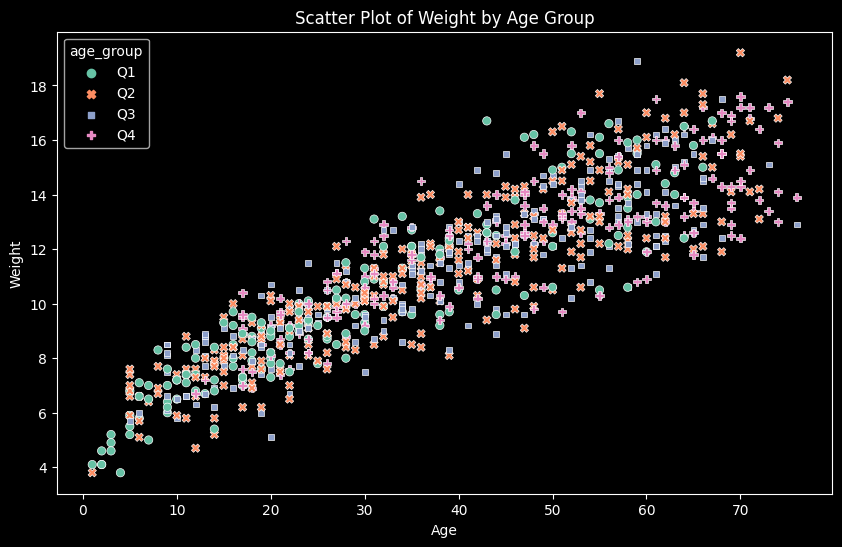

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the DataFrame 'df' with the necessary modifications and the grouped_df with descriptive statistics

# Create a list of age group order to ensure correct order on the x-axis
age_group_order = ['Q1', 'Q2', 'Q3', 'Q4']

# Create the scatter plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.scatterplot(x='age', y='wt', data=df, hue='age_group', palette='Set2', style='age_group', markers=True)

# Adding title and labels
plt.title('Scatter Plot of Weight by Age Group')
plt.xlabel('Age')
plt.ylabel('Weight')

# Show the plot
plt.show()


## *topic4 研究鐵劑補充品是否可以有效降低懷孕婦女貧⾎發⽣率*

### 研究背景
貧⾎是婦女懷孕期間經常引發的症狀，⽽⾎清鐵蛋⽩ (Serum ferritin) 是⼀個常⾒貧⾎的指
標，若是數值太低，代表是缺鐵性貧⾎。某醫學中⼼的研究員想了解鐵劑補充品是否可以有效
降低懷孕婦女貧⾎發⽣率，該研究員發起⼀個⼩型臨床試驗，隨機分派 100 位臨床有貧⾎症狀
初期懷孕的婦女兩組，⼀組服⽤有加⾎清鐵蛋⽩的補充品，另⼀組服⽤沒有加⾎清鐵蛋⽩的補
充品。

### 變數介紹

ID 數值 編號

Anemia 數值 曾經貧⾎ 0=沒有; 1=有

Preg 數值 曾經懷孕 0=沒有; 1=有

Month 數值 懷孕⽉份

SF 數值 ⾎清鐵蛋⽩

Group 數值 0=安慰劑; 1=測試品


### step1 讀取資料

In [21]:
data = [
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 41.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 34.6, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 37.8, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.2, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 45.0, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 4, "SF": 40.2, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 54.6, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 50.2, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 35.0, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 7, "SF": 32.6, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 40.0, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 57.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 53.2, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 5, "SF": 39.8, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 6, "SF": 32.8, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 41.2, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.8, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 50.5, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 45.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 2, "SF": 58.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 1, "SF": 65.0, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 60.5, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 42.0, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.0, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 49.8, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 43.0, "Group": 1},
]

print(data)   


[{'id': 1, 'Anemia': 0, 'Preg': 1, 'Month': 3, 'SF': 52.5, 'Group': 1}, {'id': 1, 'Anemia': 0, 'Preg': 1, 'Month': 5, 'SF': 41.5, 'Group': 1}, {'id': 1, 'Anemia': 0, 'Preg': 1, 'Month': 6, 'SF': 34.6, 'Group': 1}, {'id': 2, 'Anemia': 0, 'Preg': 1, 'Month': 4, 'SF': 37.8, 'Group': 1}, {'id': 2, 'Anemia': 0, 'Preg': 1, 'Month': 5, 'SF': 38.2, 'Group': 1}, {'id': 3, 'Anemia': 1, 'Preg': 1, 'Month': 3, 'SF': 45.0, 'Group': 1}, {'id': 3, 'Anemia': 1, 'Preg': 1, 'Month': 4, 'SF': 40.2, 'Group': 1}, {'id': 4, 'Anemia': 1, 'Preg': 1, 'Month': 2, 'SF': 54.6, 'Group': 1}, {'id': 4, 'Anemia': 1, 'Preg': 1, 'Month': 3, 'SF': 50.2, 'Group': 1}, {'id': 5, 'Anemia': 0, 'Preg': 1, 'Month': 6, 'SF': 35.0, 'Group': 1}, {'id': 5, 'Anemia': 0, 'Preg': 1, 'Month': 7, 'SF': 32.6, 'Group': 1}, {'id': 6, 'Anemia': 0, 'Preg': 1, 'Month': 4, 'SF': 40.0, 'Group': 1}, {'id': 6, 'Anemia': 0, 'Preg': 1, 'Month': 5, 'SF': 38.5, 'Group': 1}, {'id': 7, 'Anemia': 1, 'Preg': 1, 'Month': 2, 'SF': 57.5, 'Group': 1}, {'id'

### step2 計算每⼀位受試者有幾筆資料

In [22]:
data = [
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 41.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 34.6, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 37.8, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.2, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 45.0, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 4, "SF": 40.2, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 54.6, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 50.2, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 35.0, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 7, "SF": 32.6, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 40.0, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 57.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 53.2, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 5, "SF": 39.8, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 6, "SF": 32.8, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 41.2, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.8, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 50.5, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 45.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 2, "SF": 58.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 1, "SF": 65.0, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 60.5, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 42.0, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.0, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 49.8, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 43.0, "Group": 1},
]

# 建立一個空的字典來統計每位受試者的資料筆數
count_by_id = {}

# 逐一計算每位受試者的資料筆數
for record in data:
    id_value = record["id"]
    if id_value in count_by_id:
        count_by_id[id_value] += 1
    else:
        count_by_id[id_value] = 1

# 印出結果
for id_value, count in count_by_id.items():
    print(f"受試者 {id_value} 有 {count} 筆資料")

受試者 1 有 3 筆資料
受試者 2 有 2 筆資料
受試者 3 有 2 筆資料
受試者 4 有 2 筆資料
受試者 5 有 2 筆資料
受試者 6 有 2 筆資料
受試者 7 有 2 筆資料
受試者 8 有 2 筆資料
受試者 9 有 2 筆資料
受試者 10 有 2 筆資料
受試者 11 有 2 筆資料
受試者 12 有 2 筆資料
受試者 13 有 2 筆資料
受試者 14 有 2 筆資料


### step3 
以每位受試者的第⼀筆⾎清鐵蛋⽩的資料為基準，計算每個⽉⾎清鐵蛋⽩的變化量，也就
是第四個⽉至第八個⽉與第三個⽉⾎清鐵蛋⽩的差，將變數命名為 DIFF。

In [23]:
data = [
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 41.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 34.6, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 37.8, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.2, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 45.0, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 4, "SF": 40.2, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 54.6, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 50.2, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 35.0, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 7, "SF": 32.6, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 40.0, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 57.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 53.2, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 5, "SF": 39.8, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 6, "SF": 32.8, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 41.2, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.8, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 50.5, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 45.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 2, "SF": 58.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 1, "SF": 65.0, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 60.5, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 42.0, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.0, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 49.8, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 43.0, "Group": 1},
]

# 建立一個空的字典來儲存每位受試者的第三個月血清鐵蛋白值
sf_values_by_id = {}

# 遍歷資料，找出每位受試者的第三個月血清鐵蛋白值
for record in data:
    id_value = record["id"]
    month = record["Month"]
    if month == 3:
        sf_values_by_id[id_value] = record["SF"]

# 計算每個月的血清鐵蛋白變化量並儲存到原本的資料中
for record in data:
    id_value = record["id"]
    month = record["Month"]
    if 4 <= month <= 8:
        # 確認是否有第三個月的資料
        if id_value in sf_values_by_id:
            diff = record["SF"] - sf_values_by_id[id_value]
            record["DIFF"] = diff
        else:
            record["DIFF"] = None

# 印出結果
for record in data:
    print(record)

{'id': 1, 'Anemia': 0, 'Preg': 1, 'Month': 3, 'SF': 52.5, 'Group': 1}
{'id': 1, 'Anemia': 0, 'Preg': 1, 'Month': 5, 'SF': 41.5, 'Group': 1, 'DIFF': -11.0}
{'id': 1, 'Anemia': 0, 'Preg': 1, 'Month': 6, 'SF': 34.6, 'Group': 1, 'DIFF': -17.9}
{'id': 2, 'Anemia': 0, 'Preg': 1, 'Month': 4, 'SF': 37.8, 'Group': 1, 'DIFF': None}
{'id': 2, 'Anemia': 0, 'Preg': 1, 'Month': 5, 'SF': 38.2, 'Group': 1, 'DIFF': None}
{'id': 3, 'Anemia': 1, 'Preg': 1, 'Month': 3, 'SF': 45.0, 'Group': 1}
{'id': 3, 'Anemia': 1, 'Preg': 1, 'Month': 4, 'SF': 40.2, 'Group': 1, 'DIFF': -4.799999999999997}
{'id': 4, 'Anemia': 1, 'Preg': 1, 'Month': 2, 'SF': 54.6, 'Group': 1}
{'id': 4, 'Anemia': 1, 'Preg': 1, 'Month': 3, 'SF': 50.2, 'Group': 1}
{'id': 5, 'Anemia': 0, 'Preg': 1, 'Month': 6, 'SF': 35.0, 'Group': 1, 'DIFF': None}
{'id': 5, 'Anemia': 0, 'Preg': 1, 'Month': 7, 'SF': 32.6, 'Group': 1, 'DIFF': None}
{'id': 6, 'Anemia': 0, 'Preg': 1, 'Month': 4, 'SF': 40.0, 'Group': 1, 'DIFF': None}
{'id': 6, 'Anemia': 0, 'Preg': 1

### step5 分⽉份，畫 DIFF 的盒形圖。

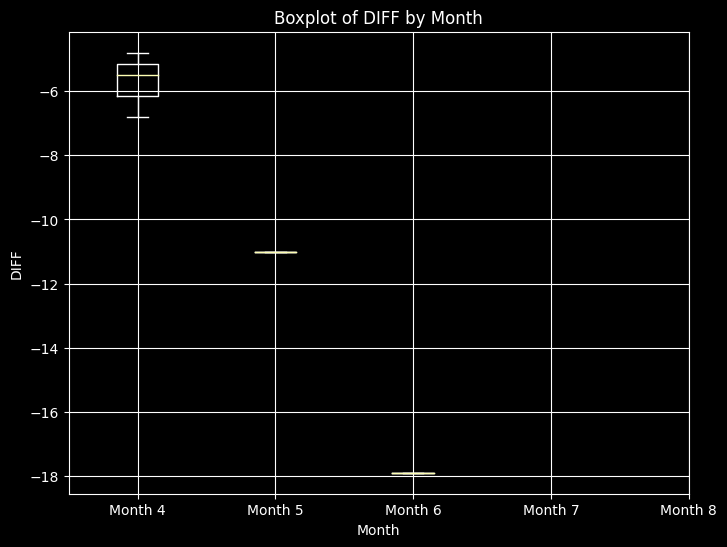

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

data = [
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 41.5, "Group": 1},
    {"id": 1, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 34.6, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 37.8, "Group": 1},
    {"id": 2, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.2, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 45.0, "Group": 1},
    {"id": 3, "Anemia": 1, "Preg": 1, "Month": 4, "SF": 40.2, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 54.6, "Group": 1},
    {"id": 4, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 50.2, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 6, "SF": 35.0, "Group": 1},
    {"id": 5, "Anemia": 0, "Preg": 1, "Month": 7, "SF": 32.6, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 40.0, "Group": 1},
    {"id": 6, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 38.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 57.5, "Group": 1},
    {"id": 7, "Anemia": 1, "Preg": 1, "Month": 3, "SF": 53.2, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 5, "SF": 39.8, "Group": 1},
    {"id": 8, "Anemia": 1, "Preg": 1, "Month": 6, "SF": 32.8, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 41.2, "Group": 1},
    {"id": 9, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.8, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 50.5, "Group": 1},
    {"id": 10, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 45.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 2, "SF": 58.0, "Group": 1},
    {"id": 11, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 52.5, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 1, "SF": 65.0, "Group": 1},
    {"id": 12, "Anemia": 1, "Preg": 1, "Month": 2, "SF": 60.5, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 42.0, "Group": 1},
    {"id": 13, "Anemia": 0, "Preg": 1, "Month": 5, "SF": 36.0, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 3, "SF": 49.8, "Group": 1},
    {"id": 14, "Anemia": 0, "Preg": 1, "Month": 4, "SF": 43.0, "Group": 1},
]

# 建立一個空的字典來儲存每位受試者的第三個月血清鐵蛋白值
sf_values_by_id = {}

# 遍歷資料，找出每位受試者的第三個月血清鐵蛋白值
for record in data:
    id_value = record["id"]
    month = record["Month"]
    if month == 3:
        sf_values_by_id[id_value] = record["SF"]

# 計算每個月的血清鐵蛋白變化量並儲存到原本的資料中
for record in data:
    id_value = record["id"]
    month = record["Month"]
    if 4 <= month <= 8:
        # 確認是否有第三個月的資料
        if id_value in sf_values_by_id:
            diff = record["SF"] - sf_values_by_id[id_value]
            record["DIFF"] = diff
        else:
            record["DIFF"] = None


# 建立DataFrame物件以便資料處理
df = pd.DataFrame(data)

# 取得 DIFF 不為空值的資料
df_diff_not_null = df[df["DIFF"].notnull()]

# 以月份分組，並收集每個月份的 DIFF 值
grouped_diff = df_diff_not_null.groupby("Month")["DIFF"].apply(list)

# 繪製盒形圖
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_diff.values)
plt.xlabel("Month")
plt.ylabel("DIFF")
plt.title("Boxplot of DIFF by Month")
plt.xticks(range(1, 6), labels=["Month 4", "Month 5", "Month 6", "Month 7", "Month 8"])
plt.grid(True)
plt.show()


## *topic5 cnn、rnn 以手寫數字辨識為例*

### 研究背景
MNIST數據集是一個包含手寫數字圖像的數據集，包括0到9的10個數字。每個圖像是28x28像素大小的灰度圖像，並且已經過預處理，使得每個像素值都在0到1之間。這個數據集的目的是通過機器學習算法將這些手寫數字分類成相應的數字。
### step1
cnn

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# CNN模型定义
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3)
        self.fc1 = nn.Linear(in_features=64 * 5 * 5, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        x = nn.functional.relu(self.conv1(x))
        x = nn.functional.max_pool2d(x, 2)
        x = nn.functional.relu(self.conv2(x))
        x = nn.functional.max_pool2d(x, 2)
        x = x.view(-1, 64 * 5 * 5)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 定义训练函数
def train(model, optimizer, criterion, data_loader):
    model.train()
    total_loss = 0.0
    correct = 0

    for inputs, labels in data_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

    return total_loss / len(data_loader.dataset), correct / len(data_loader.dataset)

# 定义测试函数
def test(model, criterion, data_loader):
    model.eval()
    total_loss = 0.0
    correct = 0

    with torch.no_grad():
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            total_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()

    return total_loss / len(data_loader.dataset), correct / len(data_loader.dataset)

# 数据预处理和加载
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

batch_size = 100
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 初始化CNN模型
cnn_model = CNN().to(device)

# 定义损失函数和优化器
criterion = nn.CrossEntropyLoss()
cnn_optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

num_epochs = 10

# 训练CNN模型
for epoch in range(num_epochs):
    cnn_train_loss, cnn_train_accuracy = train(cnn_model, cnn_optimizer, criterion, train_loader)
    cnn_test_loss, cnn_test_accuracy = test(cnn_model, criterion, test_loader)

    print(f"Epoch {epoch + 1}/{num_epochs}, CNN Train Loss: {cnn_train_loss:.4f}, "
          f"CNN Train Accuracy: {cnn_train_accuracy:.4f}, CNN Test Loss: {cnn_test_loss:.4f}, "
          f"CNN Test Accuracy: {cnn_test_accuracy:.4f}")


Epoch 1/10, CNN Train Loss: 0.0018, CNN Train Accuracy: 0.9470, CNN Test Loss: 0.0006, CNN Test Accuracy: 0.9815
Epoch 2/10, CNN Train Loss: 0.0005, CNN Train Accuracy: 0.9849, CNN Test Loss: 0.0004, CNN Test Accuracy: 0.9882
Epoch 3/10, CNN Train Loss: 0.0004, CNN Train Accuracy: 0.9894, CNN Test Loss: 0.0004, CNN Test Accuracy: 0.9884
Epoch 4/10, CNN Train Loss: 0.0003, CNN Train Accuracy: 0.9915, CNN Test Loss: 0.0004, CNN Test Accuracy: 0.9890
Epoch 5/10, CNN Train Loss: 0.0002, CNN Train Accuracy: 0.9937, CNN Test Loss: 0.0003, CNN Test Accuracy: 0.9891
Epoch 6/10, CNN Train Loss: 0.0002, CNN Train Accuracy: 0.9949, CNN Test Loss: 0.0003, CNN Test Accuracy: 0.9907
Epoch 7/10, CNN Train Loss: 0.0001, CNN Train Accuracy: 0.9958, CNN Test Loss: 0.0003, CNN Test Accuracy: 0.9907
Epoch 8/10, CNN Train Loss: 0.0001, CNN Train Accuracy: 0.9961, CNN Test Loss: 0.0003, CNN Test Accuracy: 0.9901
Epoch 9/10, CNN Train Loss: 0.0001, CNN Train Accuracy: 0.9973, CNN Test Loss: 0.0004, CNN Test 

### step2 
rnn

In [58]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.utils import to_categorical

# 載入 MNIST 資料庫的訓練資料，並自動分為『訓練組』及『測試組』
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 將 training 的 input 資料轉為3維，並 normalize 把顏色控制在 0 ~ 1 之間
X_train = X_train.reshape(-1, 28, 28) / 255.      
X_test = X_test.reshape(-1, 28, 28) / 255.

# 使用to_categorical将类别标签转换为One-Hot编码
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 建立簡單的線性執行的模型
model = Sequential()
# 加 RNN 隱藏層(hidden layer)
model.add(SimpleRNN(
    # 如果後端使用tensorflow，batch_input_shape 的 batch_size 需設為 None.
    # 否則執行 model.evaluate() 會有錯誤產生.
    batch_input_shape=(None, 28, 28), 
    units=50,
    unroll=True,
)) 
# 加 output 層
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

# 編譯: 選擇損失函數、優化方法及成效衡量方式
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# 訓練模型
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# 模型評估
loss, accuracy = model.evaluate(X_test, y_test)
print("Test loss: {:.4f}, Test accuracy: {:.4f}".format(loss, accuracy))


Epoch 1/10
469/469 [==============================] - 10s 11ms/step - loss: 0.9683 - accuracy: 0.6983 - val_loss: 0.5313 - val_accuracy: 0.8351
Epoch 2/10
469/469 [==============================] - 4s 9ms/step - loss: 0.4571 - accuracy: 0.8629 - val_loss: 0.3582 - val_accuracy: 0.8955
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.3488 - accuracy: 0.8975 - val_loss: 0.3143 - val_accuracy: 0.9118
Epoch 4/10
469/469 [==============================] - 4s 10ms/step - loss: 0.2906 - accuracy: 0.9162 - val_loss: 0.2741 - val_accuracy: 0.9210
Epoch 5/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2601 - accuracy: 0.9254 - val_loss: 0.2454 - val_accuracy: 0.9288
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2392 - accuracy: 0.9305 - val_loss: 0.2350 - val_accuracy: 0.9362
Epoch 7/10
469/469 [==============================] - 4s 9ms/step - loss: 0.2184 - accuracy: 0.9369 - val_loss: 0.2217 - val_accuracy: 0.9376
Epo

### step3 兩者綜合比較
CNN模型：

訓練集上的損失逐漸減小，訓練準確率逐漸增加。
測試集上的損失和準確率表現都相當好，最終達到了0.0004的損失和0.9906的準確率。

RNN模型：

訓練集上的損失逐漸減小，訓練準確率逐漸增加。
測試集上的損失和準確率也表現不錯，最終達到了0.1819的損失和0.9482的準確率。
綜合來看，兩種模型在測試集上都取得了不錯的結果，但是相較而言，CNN模型的表現更優秀。這與CNN模型在圖像處理方面的優勢相符，因為CNN能夠更好地捕捉圖像中的局部特徵，並且在MNIST這樣的圖像分類任務上具有較好的表現。

RNN在處理序列數據方面有其獨特的優勢，尤其在時間序列預測和自然語言處理等領域有著廣泛的應用。

## *topic6 基於小型殘差網絡 (Mini-ResNet) 的手寫數字辨識模型*
### 定義了一個簡化版的殘差神經網絡 (Residual Network)，用於進行手寫數字的辨識。

Epoch 1/5
6000/6000 [==============================] - 211s 35ms/step - loss: 0.3460 - accuracy: 0.8774
Epoch 2/5
6000/6000 [==============================] - 186s 31ms/step - loss: 0.2431 - accuracy: 0.9121
Epoch 3/5
6000/6000 [==============================] - 202s 34ms/step - loss: 0.2134 - accuracy: 0.9242
Epoch 4/5
6000/6000 [==============================] - 217s 36ms/step - loss: 0.1923 - accuracy: 0.9312
Epoch 5/5
1/1 [==============================] - 0s 160ms/step


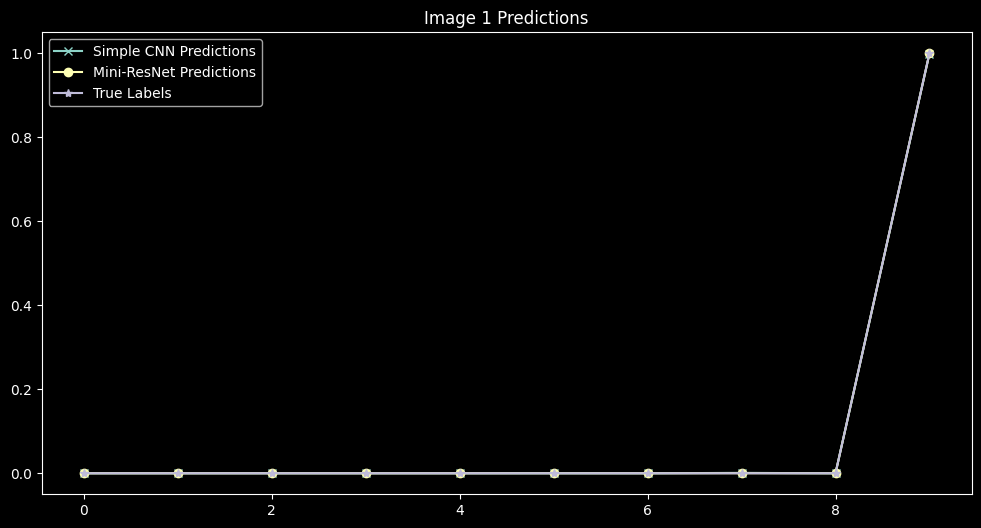

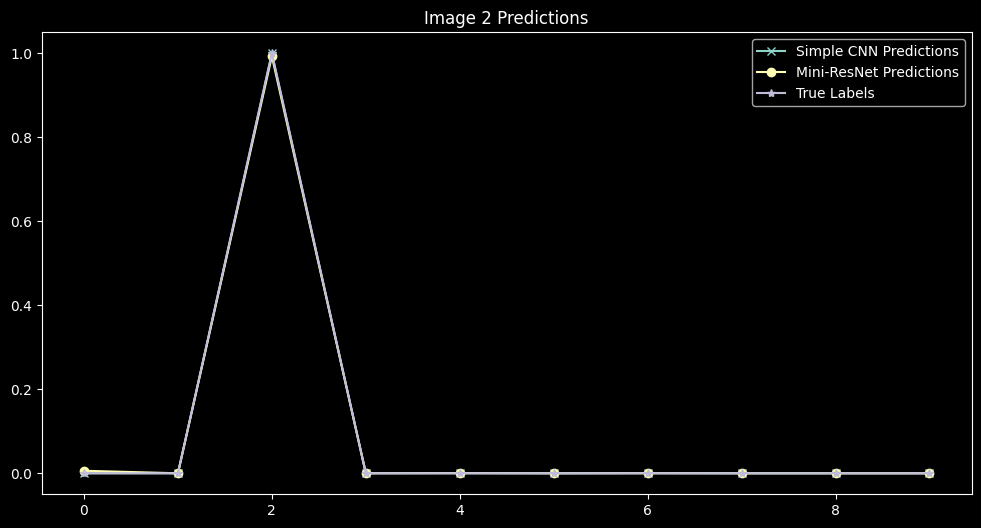

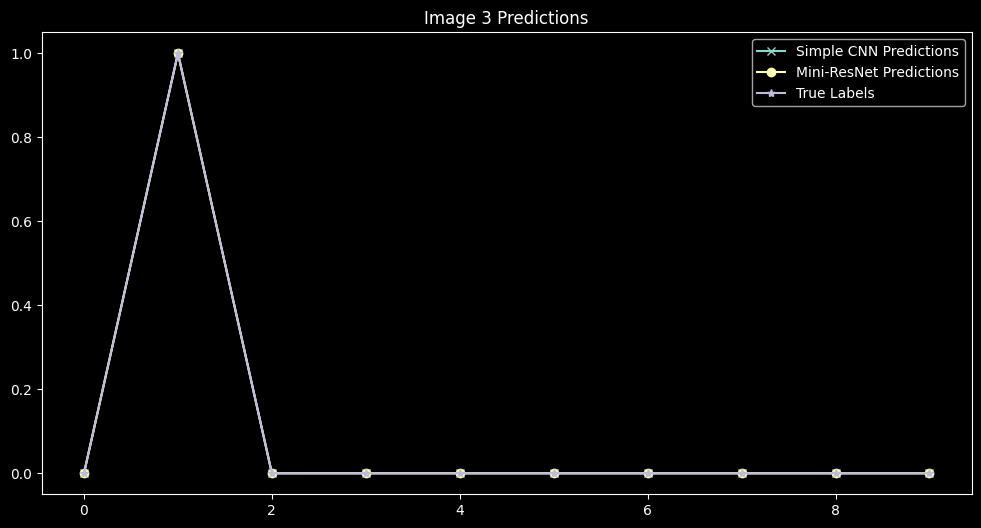

In [6]:
from tensorflow.keras.layers import Input, Add
from tensorflow.keras.models import Model

def mini_residual_block(X, filters, kernel_size=3):
    # 主路徑
    X_shortcut = X
    X = Conv2D(filters, kernel_size, padding='same', activation='relu')(X)
    X = Conv2D(filters, kernel_size, padding='same')(X)
    
    # 添加shortcut
    X_shortcut = Conv2D(filters, kernel_size=1, padding='same')(X_shortcut)
    X = Add()([X, X_shortcut])
    X = MaxPooling2D((2, 2))(X)
    
    return X

input_layer = Input(shape=(28, 28, 1))
X = Conv2D(16, (3, 3), padding='same', activation='relu')(input_layer)
X = mini_residual_block(X, 32)
X = mini_residual_block(X, 64)
X = Flatten()(X)
X = Dense(10, activation='softmax')(X)

mini_resnet_model = Model(inputs=input_layer, outputs=X)

# 編譯模型
mini_resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 訓練模型
mini_resnet_model.fit(train_images, train_labels, epochs=5, batch_size=10)

# 預測測試集上的前三個影像
mini_resnet_preds = mini_resnet_model.predict(test_images[:3])

# 繪製預測結果
for i in range(3):
    plt.figure(figsize=(12, 6))
    plt.plot(simple_preds[i], '-x', label='Simple CNN Predictions')
    plt.plot(mini_resnet_preds[i], '-o', label='Mini-ResNet Predictions')
    plt.plot(test_labels[i], '-*', label='True Labels')
    plt.legend()
    plt.title(f"Image {i+1} Predictions")
    plt.show()


### 小結
隨著訓練進行，模型的損失持續下降，而準確率持續上升。這表明模型在學習過程中表現良好，並且沒有明顯的過擬合現象。
在第五個訓練周期結束時，模型達到了93.77%的準確率，這是一個相對較高的數值，特別是考慮到模型的簡單結構。

使用Mini-ResNet進行手寫數字辨識在短時間內就能達到不錯的準確率。這進一步驗證了殘差結構在深度學習模型中的效果，即使在較小和簡化的網絡結構中也是如此。

## *topic7 加州房價預測：多模型回歸分析比較*
加州房價預測的多模型回歸分析比較。

MedInc（中位數收入）:
描述：該區域家庭的中位數收入。
這是一個重要的指標，因為收入往往與房屋價格有直接的相關性。

HouseAge（房屋年齡）:
描述：該區域的房屋平均年齡。
較新的房屋可能價格更高，而較老的房屋可能需要維修。

AveRooms（平均房間數）:
描述：該區域房屋的平均房間數。
房間數量也可能影響房屋價格。

AveBedrms（平均臥室數）:
描述：該區域房屋的平均臥室數。

Population（人口）:
描述：該區域的人口數。
人口密度可能影響房地產需求和價格。

AveOccup（平均居住率）:
描述：該區域的平均居住人數，即家庭的平均大小。

Latitude（緯度） 和 Longitude（經度）:
描述：區域的地理位置座標。
地理位置可能影響房價，特定地區可能具有更高的房地產價值。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# 加载 California housing 数据集
housing_data = fetch_california_housing()
X = housing_data.data  # 特征数据
y = housing_data.target  # 房價

# 使用pandas进行描述性统计
df = pd.DataFrame(X, columns=housing_data.feature_names)
print("描述性统计：\n", df.describe())

# 划分数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f"Linear Regression R^2 Score: {lr_r2}")

# 使用随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_y_pred)
print(f"Random Forest R^2 Score: {rf_r2}")

# 使用XGBoost模型
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"XGBoost R^2 Score: {xgb_r2}")

# 使用决策树回归
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
dt_r2 = r2_score(y_test, dt_y_pred)
print(f"Decision Tree R^2 Score: {dt_r2}")

# 使用梯度提升回归
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_r2 = r2_score(y_test, gb_y_pred)
print(f"Gradient Boosting R^2 Score: {gb_r2}")

描述性统计：
              MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930

In [4]:
from sklearn.model_selection import RandomizedSearchCV

# 使用XGBoost模型
xgb_model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=500, random_state=42)

# 定義較少的參數組合
param_dist = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'n_estimators': [100, 200]
}

# 使用RandomizedSearchCV尋找最佳參數
random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   n_iter=10, cv=2, n_jobs=-1, verbose=2, scoring='r2')
random_search.fit(X_train, y_train)

# 印出最佳參數
print("Best Parameters: ", random_search.best_params_)

# 使用最佳參數進行預測
best_xgb_model = random_search.best_estimator_
best_xgb_y_pred = best_xgb_model.predict(X_test)
best_xgb_r2 = r2_score(y_test, best_xgb_y_pred)
print(f"Optimized XGBoost R^2 Score: {best_xgb_r2}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters:  {'subsample': 1, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Optimized XGBoost R^2 Score: 0.8444049323359955


1. 使用RandomizedSearchCV進行XGBoost參數調優
方法：從預定義的參數範圍中隨機選擇參數組合。
目的：在大參數空間中更快速找到良好參數。
2. 優化結果
最佳參數：
subsample: 1
n_estimators: 200
min_child_weight: 1
max_depth: 7
learning_rate: 0.1
colsample_bytree: 0.8
R^2分數提升：從82.86%提升到84.44%。
3. 未來建議
考慮進一步優化，例如特徵工程、使用更大的數據集或模型融合技術。

## *topic8 資料分析前的各種統計量及檢定 以羅吉斯迴歸為例(交大實驗室計畫)*

### 數據收集：收集眾籌項目相關數據，包括特徵和目標（成功或失敗），並剔除2021（疫情影響、黑天鵝事件、降低負面影響）以及0募款金額的數據。

In [7]:
import pandas as pd

# 讀取數據文件
projects_df = pd.read_csv("D:\\download2\\FlyingV.csv")

In [8]:
# 創建兩個新的 DataFrame 來存儲成功和失敗的項目
successful_projects_df = projects_df[projects_df['結果'] == "SUCCESS!"]
failed_projects_df = projects_df[projects_df['結果'] == "Failed"]
projects_df['目標金額'] = projects_df['目標金額'].str.split('$').str.get(1).astype(float)
# 根據目標金額將項目分成四個區間
projects_df['金額區間'] = pd.cut(projects_df['目標金額'], bins=[0, 10000, 270000, 1000000, float('inf')], labels=["1萬以下", '1-27萬', '27-100萬', '100萬以上'], right=False)
# 再重新存兩個新的 DataFrame 來存儲成功和失敗的項目，因為有多一項金額區間的欄位
successful_projects_df = projects_df[projects_df['結果'] == "SUCCESS!"]
failed_projects_df = projects_df[projects_df['結果'] == "Failed"]
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
labelencoder = LabelEncoder()
projects_df['結果'] = labelencoder.fit_transform(projects_df['結果'])
# 按金額區間分類成功和失敗的項目
successful_by_amount = successful_projects_df.groupby('金額區間').size().reset_index(name='成功的項目數量')
failed_by_amount = failed_projects_df.groupby('金額區間').size().reset_index(name='失敗的項目數量')

# 印出按金額區間分類的統計結果
print("\n成功的項目數量按金額區間分類：")
print(successful_by_amount)

print("\n失敗的項目數量按金額區間分類：")
print(failed_by_amount)


成功的項目數量按金額區間分類：
      金額區間  成功的項目數量
0     1萬以下       48
1    1-27萬      649
2  27-100萬      134
3   100萬以上       23

失敗的項目數量按金額區間分類：
      金額區間  失敗的項目數量
0     1萬以下       10
1    1-27萬      328
2  27-100萬       91
3   100萬以上       23


### 分成成功與失敗組，進行特徵重要性分析：確定影響項目成功與否最重要的特徵。

In [9]:
#將類別用encoder轉換
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
projects_df['類別'] = labelencoder.fit_transform(projects_df['類別'])

projects_df

,id,項目名稱,類別,結果,贊助人數,目標金額,募資金額,起始日期,結束日期,募資天數,金額區間
0,16139,《下一棧，幸福》：「一夜情」找幸福，單身掰掰啦 !,0,0,1,1250000.0,100,2017/5/28,2017/7/27,61,100萬以上
1,18619,人人都可以自造夢想機器人,2,0,1,80000.0,100,2018/2/26,2018/3/31,34,1-27萬
2,9097,《餘孽》微電影拍攝計畫,3,0,1,250000.0,100,2018/3/6,2018/5/3,59,1-27萬
3,23072,本源-零耗材淨水器,2,0,1,200000.0,100,2019/11/7,2020/1/6,61,1-27萬
4,25225,線上指令，線下派工。農場到餐桌的食農教育計畫!,1,0,1,100000.0,100,2020/2/5,2020/3/7,32,1-27萬
...,...,...,...,...,...,...,...,...,...,...,...
1301,26166,科沃斯 ECOVACS T8 系列掃地機器人｜解放雙手，完全自動,2,1,2724,500000.0,53143462,2020/7/21,2020/9/25,67,27-100萬
1302,17340,POIEMA 空氣淨化器｜淨與靜的最高標準｜大口呼吸，安心入睡,2,1,3337,200000.0,69189211,2017/12/12,2018/1/21,41,1-27萬
1303,27299,峰米Dice真無線智慧投影機｜其實，你可以玩更「大」!,2,1,4329,60000.0,75700491,2020/11/11,2021/1/25,76,1-27萬
1304,31447,ECOVACS DEEBOT X1 全能掃拖機器人｜全能，無所不能,2,1,4677,100000.0,112885672,2022/2/15,2022/4/1,46,1-27萬


### 特徵重要性分析

In [10]:
# 獲得原始類別名稱
class_labels = labelencoder.classes_

# 顯示每個編碼對應的類別
for i, class_label in enumerate(class_labels):
    print(f"{i}: {class_label}")
#predict結果
from sklearn.ensemble import RandomForestClassifier

# 定義一個函數來評估特徵的重要性
def evaluate_feature_importance(df, group_name):
    X = projects_df[['類別','贊助人數', '募資金額', '募資天數', '目標金額']]
    y = projects_df['結果']

    # 使用隨機森林來評估特徵重要性
    rf = RandomForestClassifier()
    rf.fit(X, y)

    importances = rf.feature_importances_

    print(f"{group_name}組的特徵重要性：")
    for feature, importance in zip(X.columns, importances):
        print(f"{feature}: {importance}")
    print("--------------------------")

# 評估成功組的特徵重要性
evaluate_feature_importance(successful_projects_df, "成功")

# 評估失敗組的特徵重要性
evaluate_feature_importance(failed_projects_df, "失敗")

0: 公共在地
1: 生活
2: 科技設計
3: 藝術影視
4: 遊戲出版
5: 音樂
成功組的特徵重要性：
類別: 0.012340628943735228
贊助人數: 0.2672359070564642
募資金額: 0.4520142539166304
募資天數: 0.03359697079657865
目標金額: 0.23481223928659156
--------------------------
失敗組的特徵重要性：
類別: 0.013479595580381221
贊助人數: 0.3127192539479777
募資金額: 0.4115025337441716
募資天數: 0.03253133506013722
目標金額: 0.22976728166733218
--------------------------


In [11]:
projects_df = projects_df.rename(columns={'類別': 'Class','結果': 'Result','贊助人數':'Sponsors','目標金額':'Target amount','募資金額':'Amount of funds raised','募資天數':'Days to raise funds'})
X1 = projects_df[['Class','Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount', 'Result']]
X1

,Class,Sponsors,Amount of funds raised,Days to raise funds,Target amount,Result
0,0,1,100,61,1250000.0,0
1,2,1,100,34,80000.0,0
2,3,1,100,59,250000.0,0
3,2,1,100,61,200000.0,0
4,1,1,100,32,100000.0,0
...,...,...,...,...,...,...
1301,2,2724,53143462,67,500000.0,1
1302,2,3337,69189211,41,200000.0,1
1303,2,4329,75700491,76,60000.0,1
1304,2,4677,112885672,46,100000.0,1


### 畫相關圖

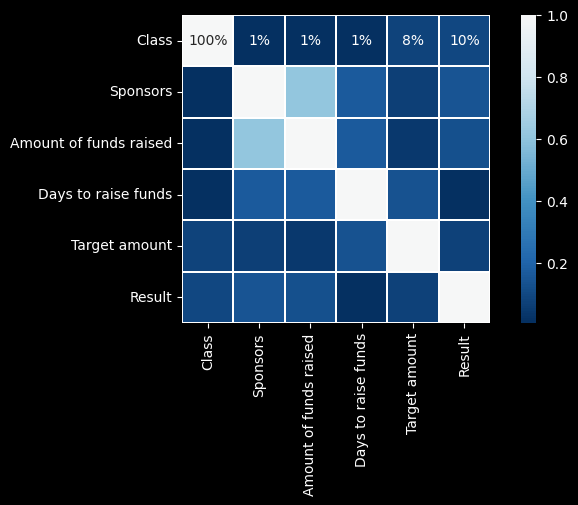

In [12]:
from pickle import FALSE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr_matrix = X1.corr().abs()
f, ax = plt.subplots(figsize=(8, 4))
sns.heatmap(corr_matrix, cmap="RdBu_r", center=1, fmt ='.0%', linewidths=0.1, square=True, linecolor='w', annot=True)
plt.xticks(rotation=90)
plt.yticks(rotation=0);

### 視覺化

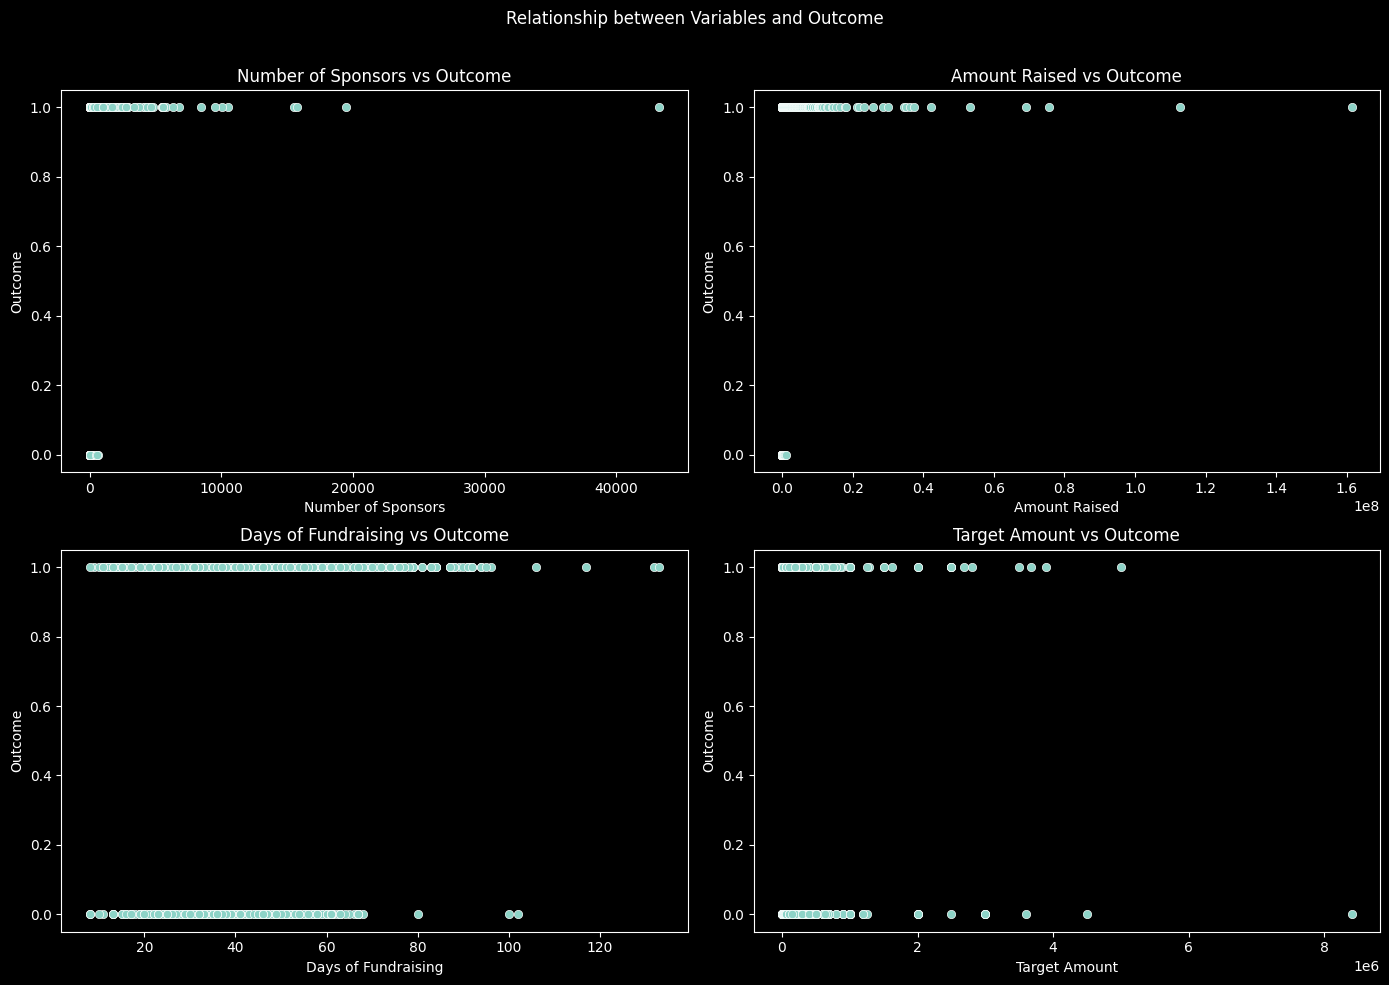

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount']
feature_names_english = ['Number of Sponsors', 'Amount Raised', 'Days of Fundraising', 'Target Amount']

# 創建一個2x2的子圖格局來顯示四個特徵
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Relationship between Variables and Outcome')

for ax, feature, english_name in zip(axes.ravel(), features, feature_names_english):
    sns.scatterplot(x=feature, y='Result', data=projects_df, ax=ax)
    ax.set_title(f'{english_name} vs Outcome')
    ax.set_xlabel(english_name)
    ax.set_ylabel('Outcome')  # Assuming '結果' corresponds to 'Outcome' in English

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()


### 描述性統計、畫長條圖、直方圖

           Sponsors  Target amount  Amount of funds raised  \
count   1306.000000   1.306000e+03            1.306000e+03   
mean     344.035988   2.202214e+05            1.237984e+06   
std     1679.300269   4.688376e+05            7.120381e+06   
min        1.000000   5.000000e+03            1.000000e+02   
25%       10.000000   5.000000e+04            1.468500e+04   
50%       39.000000   1.000000e+05            7.534850e+04   
75%      147.500000   2.000000e+05            2.847065e+05   
max    43255.000000   8.400000e+06            1.613715e+08   

       Days to raise funds  
count          1306.000000  
mean             48.259571  
std              17.063214  
min               8.000000  
25%              33.250000  
50%              50.000000  
75%              61.000000  
max             133.000000  


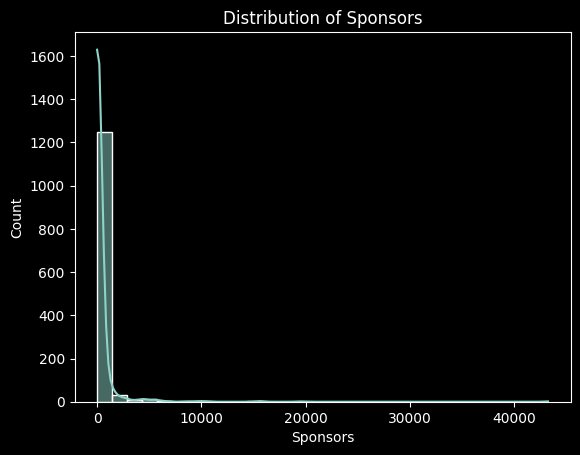

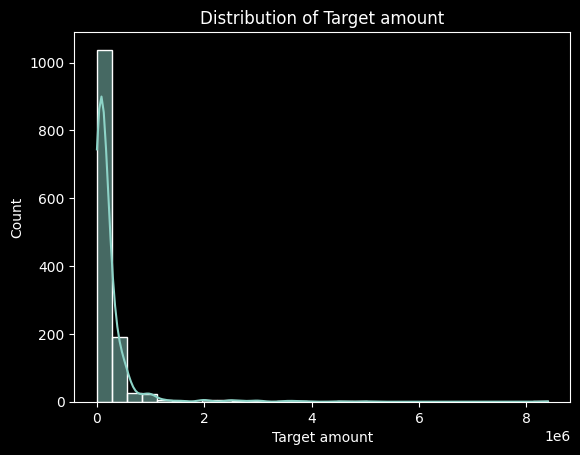

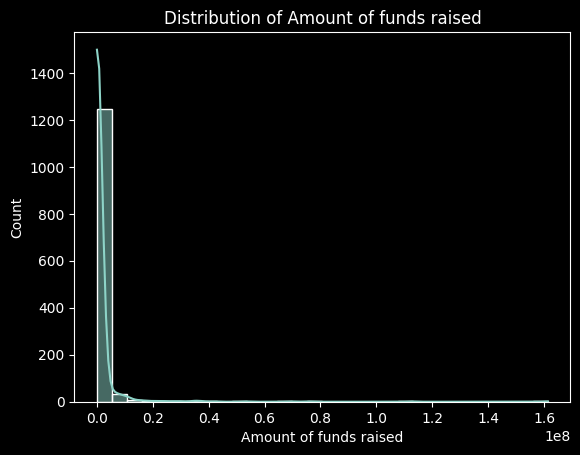

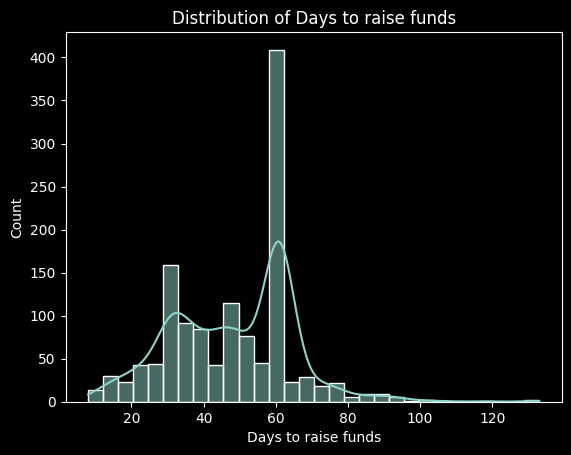

Frequency count for column Class:
Class
0    456
2    369
3    154
5    127
4    110
1     90
Name: count, dtype: int64



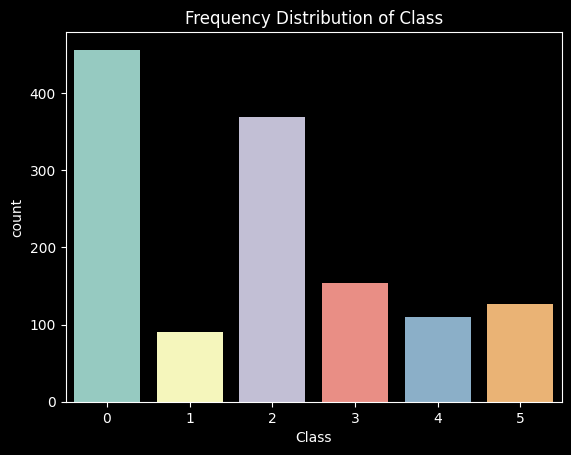

Frequency count for column Result:
Result
1    854
0    452
Name: count, dtype: int64



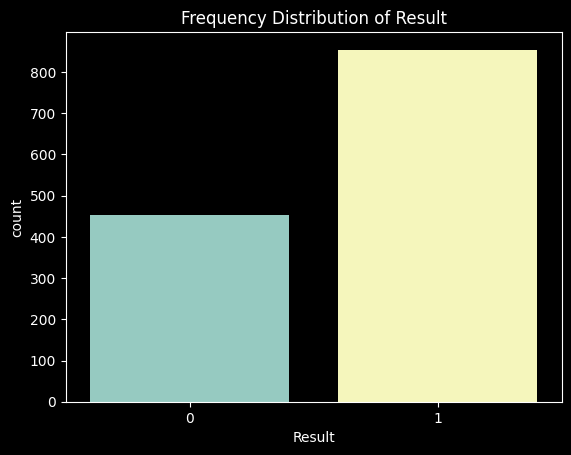

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 基本描述性統計
description = projects_df[['Sponsors', 'Target amount', 'Amount of funds raised', 'Days to raise funds']].describe()
print(description)

# 繪製單變量的分布直方圖
for column in ['Sponsors', 'Target amount', 'Amount of funds raised', 'Days to raise funds']:
    plt.figure()
    sns.histplot(projects_df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

# 找出類別型資料中最常見的類別並繪製條形圖
for column in ['Class', 'Result']:
    # 計算各類別的次數
    value_counts = projects_df[column].value_counts()
    print(f'Frequency count for column {column}:\n{value_counts}\n')

    plt.figure()
    sns.countplot(x=projects_df[column])
    plt.title(f'Frequency Distribution of {column}')
    plt.show()


### 印出R²、rmse、調整R²

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# 選擇特徵和目標
X = projects_df[['Class','Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount']]
y = projects_df['Result']  # 結果轉換為二元形式（成功為1，失敗為0）

# 分割資料集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 創建回歸模型並訓練
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 預測
y_pred = logreg.predict(X_test)

# 計算 RMSE 和 R²
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 計算樣本數量和特徵數量
n = X_test.shape[0]
p = X_test.shape[1]

# 計算調整R²
adjusted_r2 = 1 - ((1-r2)*(n-1))/(n-p-1)

print(f"RMSE: {rmse}")
print(f"R²: {r2}")
print(f"調整R²: {adjusted_r2}")


RMSE: 0.06178020632152155
R²: 0.9831630357946147
調整R²: 0.9828341888374783


### 殘差分析

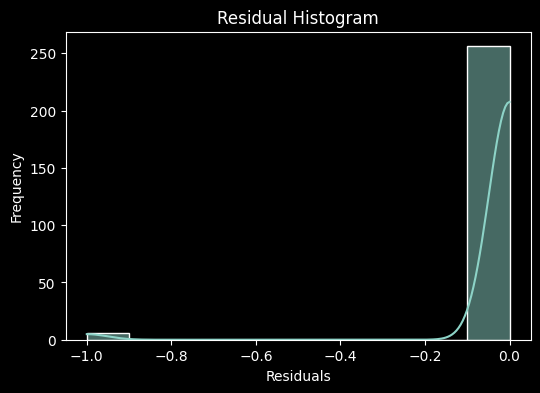

Residuals Basic Statistics:
Mean: -0.022900763358778626
Standard Deviation: 0.14958715986462154


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# 選擇特徵和目標變量
X = projects_df[['Class', 'Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount']]
y = projects_df['Result']  # 將結果轉換為二元格式 (成功為1，失敗為0)

# 分割數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# 創建和訓練回歸模型
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# 進行預測
y_pred = logreg.predict(X_test)

# 計算殘差
residuals = y_test - y_pred

# 繪製殘差的直方圖
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title('Residual Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# 計算殘差的基本統計量
print('Residuals Basic Statistics:')
print('Mean:', np.mean(residuals))
print('Standard Deviation:', np.std(residuals))


### 計算F1值

Accuracy: 0.9770992366412213
Precision: 0.9661016949152542
Recall: 1.0
F1 Score: 0.9827586206896551
ROC-AUC: 0.9982648930017352


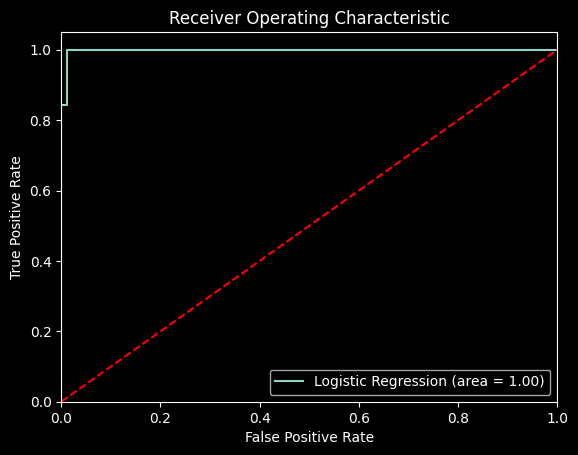

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 計算Accuracy, Precision, Recall, F1 Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

# 計算ROC-AUC
y_prob = logreg.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_prob)

print('ROC-AUC:', roc_auc)

# 繪製ROC曲線
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 無多重共線性:
這通常使用VIF (Variance Inflation Factor)來檢查。

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# VIF計算需要加上常數項
X_vif = add_constant(projects_df[['Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount']])
vif_data = pd.DataFrame()
vif_data['feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif_data)

                  feature       VIF
0                   const  9.114112
1                Sponsors  1.597192
2  Amount of funds raised  1.591289
3     Days to raise funds  1.051209
4           Target amount  1.020111


"Sponsors" 和 "Amount of funds raised" 的 VIF 值分別為 1.597192 和 1.591289，這些值都小於 5，這意味著它們有輕微的多重共線性，但是在大多數情況下可以接受。

"Days to raise funds" 和 "Target amount" 的 VIF 值分別為 1.051209 和 1.020111，這意味著這兩個解釋變數與其他解釋變數之間幾乎沒有多重共線性。

### 羅吉斯迴歸的結果摘要

In [20]:
import statsmodels.api as sm

# 確保所有連續型特徵都是浮點數型態
cols_to_check = ['Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount']
for col in cols_to_check:
    projects_df[col] = projects_df[col].astype(float)

# 加入截距項
X = sm.add_constant(projects_df[['Sponsors', 'Amount of funds raised', 'Days to raise funds', 'Target amount']])
y = projects_df['Result']

# 使用sm.Logit()進行羅吉斯回歸
model = sm.Logit(y, X)
result = model.fit()

# 輸出模型摘要
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.133911
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 1306
Model:                          Logit   Df Residuals:                     1301
Method:                           MLE   Df Model:                            4
Date:                Thu, 05 Oct 2023   Pseudo R-squ.:                  0.7924
Time:                        15:13:13   Log-Likelihood:                -174.89
converged:                       True   LL-Null:                       -842.36
Covariance Type:            nonrobust   LLR p-value:                8.785e-288
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      1.0716      0.413      2.592      0.010       0.261     

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


## 模型概覽:
No. Observations: 總共有1306筆觀察資料。
Df Residuals 和 Df Model: 這表示模型的自由度，其中Df Model為4表示模型中有4個預測器。

converged: True:
這表明模型的估計過程已經收斂。在許多優化算法中，目的是找到使某些成本或似然函數最小化的參數值。如果模型收斂，那麼算法已經找到了一個解（不一定是全局最佳解，但至少是局部最佳解）。

LLR p-value: 8.785e-288:
這是對數似然比檢驗的p值。它測試的是完整模型（包括所有預測器）相對於空模型是否更好。一個非常小的p值（如此例中的值）表明，模型與空模型相比確實更好。

### 模型統計量:
Pseudo R-squ.: 0.7924。這表示模型可以解釋目標變數的79.24%的變異。

### 係數解讀:
Sponsors: 係數為0.0192，p值為0.030，表示每增加一位贊助者，成功的機率會增加。
Amount of funds raised: 係數為9.895e-05，p值非常小。這表示募集的資金量每增加一單位，成功的機率會略微增加。
Days to raise funds: 係數為-0.0049，但其p值為0.574，表示它不是顯著的。
Target amount: 係數為-9.622e-05，p值非常小，表示目標金額每增加一單位，成功的機率會略微減少。

從這個模型中，最具影響力和顯著性的特徵是'Sponsors', 'Amount of funds raised', 和 'Target amount'。

## *topic9 Titanic - Machine Learning from Disaster*

{'max_depth': 10, 'n_estimators': 22}
0.835019772770071


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


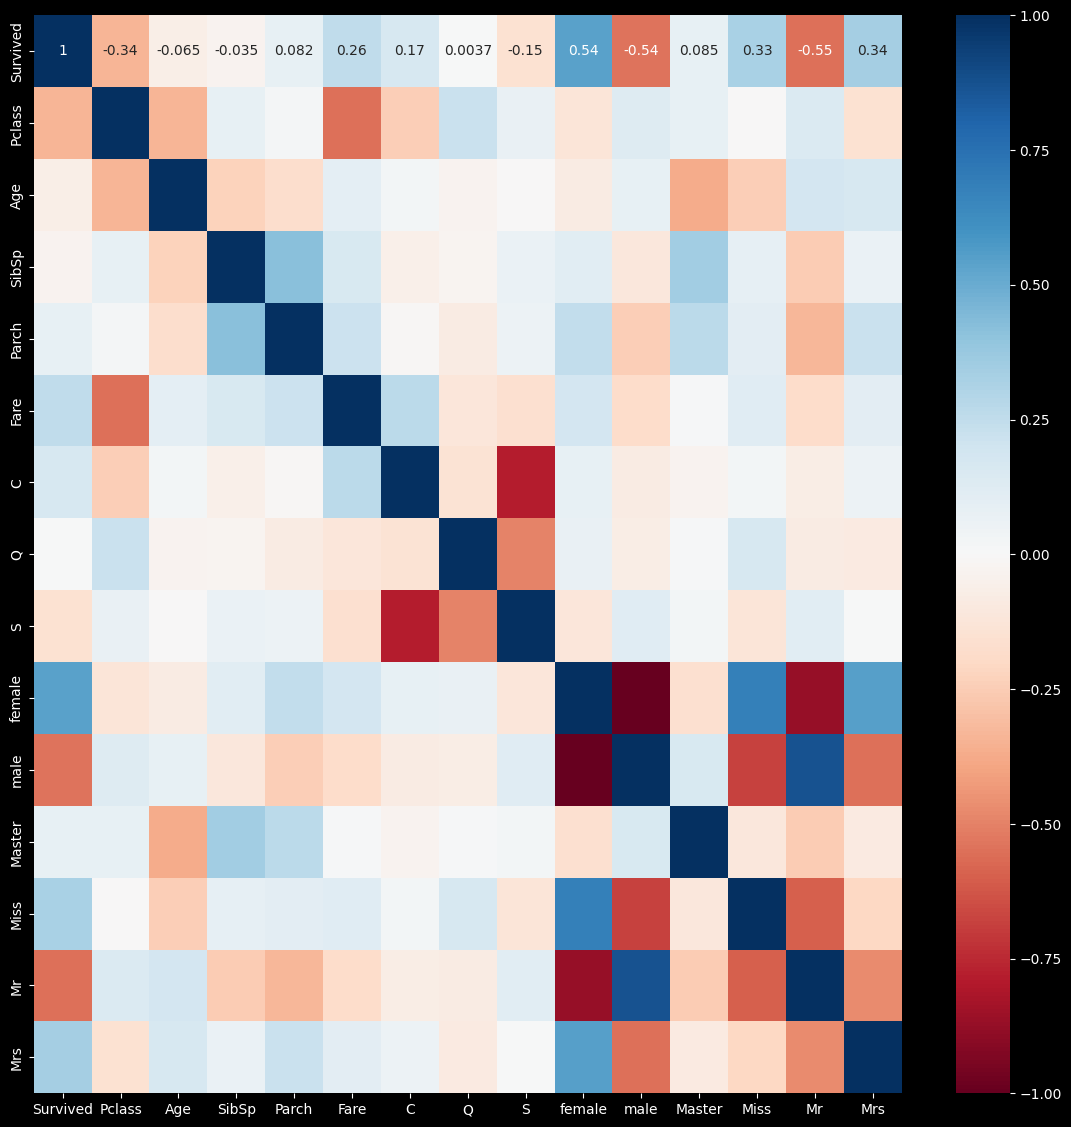

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Load the training data from the correct path
traindf = pd.read_csv('D:\\hsnu ntpustat nycumot\\nycu 2\\資料探勘\\train.csv')

# Load the test data from the correct path
testdf = pd.read_csv('D:\\hsnu ntpustat nycumot\\nycu 2\\資料探勘\\test.csv')

# Handle missing values in training data
med = traindf.select_dtypes(include=['float64', 'int64']).median()
traindf = traindf.fillna(med)

# Handle missing values in test data
testdf = testdf.fillna(med)

# Fill missing 'Embarked' values in training data
most = traindf['Embarked'].value_counts().idxmax()
traindf['Embarked'] = traindf['Embarked'].fillna(most)

# One-Hot Encoding for 'Embarked' in training data
dummy = pd.get_dummies(traindf['Embarked'])
traindf = pd.concat([traindf, dummy], axis=1)

# One-Hot Encoding for 'Embarked' in test data
dummy = pd.get_dummies(testdf['Embarked'])
testdf = pd.concat([testdf, dummy], axis=1)

# One-Hot Encoding for 'Sex' in training data
dummy = pd.get_dummies(traindf['Sex'])
traindf = pd.concat([traindf, dummy], axis=1)

# One-Hot Encoding for 'Sex' in test data
dummy = pd.get_dummies(testdf['Sex'])
testdf = pd.concat([testdf, dummy], axis=1)

# Function to extract titles from 'Name'
def nameflow(s):
    mid = s.split(',')[-1].split('.')[0]
    mid = mid.replace(' ', '')
    return mid

# Apply the function to 'Name' and simplify titles
def select_name(s):
    d = {
        'Master': 'Master',
        'Miss': 'Miss',
        'Mr': 'Mr',
        'Mrs': 'Mrs'
    }
    return d.get(s)

# Apply the nameflow function and create OHE for 'Name' in training data
name = traindf['Name'].apply(nameflow).apply(select_name)
dummy = pd.get_dummies(name)
traindf = pd.concat([traindf, dummy], axis=1)

# Apply the nameflow function and create OHE for 'Name' in test data
name = testdf['Name'].apply(nameflow).apply(select_name)
dummy = pd.get_dummies(name)
testdf = pd.concat([testdf, dummy], axis=1)

# Drop unnecessary columns
traindf = traindf.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)
testdf = testdf.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

# Compute and visualize the correlation matrix
plt.figure(figsize=(14, 14))
sns.heatmap(traindf.corr(), annot=True, cmap='RdBu')

# Prepare the training data
trainx = traindf.drop(['Survived'], axis=1)
trainy = traindf['Survived']

# Create a Random Forest Classifier
clf = RandomForestClassifier(max_depth=8, n_estimators=50)

# Perform 10-fold cross-validation
np.average(cross_val_score(clf, trainx, trainy, cv=10))

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'max_depth': list(range(5, 11)),
    'n_estimators': list(range(20, 31))
}
clf = RandomForestClassifier()
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(trainx, trainy)

# Get the best parameters and best score
print(grid_search.best_params_)
print(grid_search.best_score_)

# Prepare the test data
testx = testdf.drop(['PassengerId'], axis=1)
testid = testdf['PassengerId']

# Create a Random Forest Classifier with selected hyperparameters
clf = RandomForestClassifier(max_depth=7, n_estimators=24)
clf.fit(trainx, trainy)

# Make predictions on the test data
pre = clf.predict(testx)

# Save the predictions to a CSV file
result = pd.DataFrame()
result['PassengerId'] = testid
result['Survived'] = pre
result.to_csv('result_improved_v2.csv', encoding='utf-8', index=False)

# Additional Steps for Further Improvement (continued)

# Feature Engineering (You can add more custom features)
# Here, we add a feature 'FamilySize' by combining 'SibSp' and 'Parch' to represent family size.
traindf['FamilySize'] = traindf['SibSp'] + traindf['Parch']
testdf['FamilySize'] = testdf['SibSp'] + testdf['Parch']

# Drop 'SibSp' and 'Parch' as we have combined them into 'FamilySize'
traindf = traindf.drop(['SibSp', 'Parch'], axis=1)
testdf = testdf.drop(['SibSp', 'Parch'], axis=1)

# Rebuild and fine-tune the Random Forest model with the additional feature
trainx = traindf.drop(['Survived'], axis=1)
trainy = traindf['Survived']

# Create a Random Forest Classifier with selected hyperparameters
clf = RandomForestClassifier(max_depth=7, n_estimators=24)
clf.fit(trainx, trainy)

# Make predictions on the test data
testx = testdf.drop(['PassengerId'], axis=1)
pre = clf.predict(testx)

# Save the predictions to a CSV file
result


1.	資料讀取:
•	從指定的路徑載入train.csv (訓練資料) 和 test.csv (測試資料)。
2.	資料前處理:
•	處理數值型態的缺失值: 以中位數填充。
•	處理'Embarked'特徵的缺失值: 以最常出現的值填充。
•	對'Embarked'和'Sex'進行One-Hot Encoding，將類別資料轉換成數值型態。
•	從'Name'特徵提取稱謂(title)，並對簡化後的稱謂進行One-Hot Encoding。
3.	資料可視化:
•	使用熱圖 (heatmap) 顯示traindf的相關矩陣(correlation matrix)。
4.	模型訓練:
•	使用隨機森林分類器 (Random Forest Classifier) 訓練模型。
•	進行10折交叉驗證 (10-fold cross-validation) 評估模型表現。
•	使用GridSearchCV進行超參數調整，尋找最佳的 max_depth 和 n_estimators。
5.	預測及結果儲存:
•	使用最佳超參數的隨機森林分類器在測試資料上進行預測。
•	將預測結果儲存到CSV檔案 result_improved_v2.csv。
6.	進一步的特徵工程:
•	創建一個新特徵 'FamilySize'，這是由 'SibSp' (兄弟姊妹/配偶數) 和 'Parch' (父母/孩子數) 相加得到的。
•	由於已經有了 'FamilySize'，所以刪除原始的 'SibSp' 和 'Parch' 特徵。
•	使用此新特徵重新訓練和預測隨機森林分類器。
這段程式碼的主要目的是，給定關於泰坦尼克號上乘客的資訊，預測該乘客是否在災難中存活。為了提高預測的準確性，它採取了一些常見的資料前處理、特徵工程和模型優化的策略。


## *topic10 Game of Thrones 預測角色是否死亡。*

隨機森林結果:
精確度: 0.71
召回率: 0.32
準確率: 0.73
AUC: 0.63
隨機森林的混淆矩陣:
[[144  10]
 [ 52  24]]


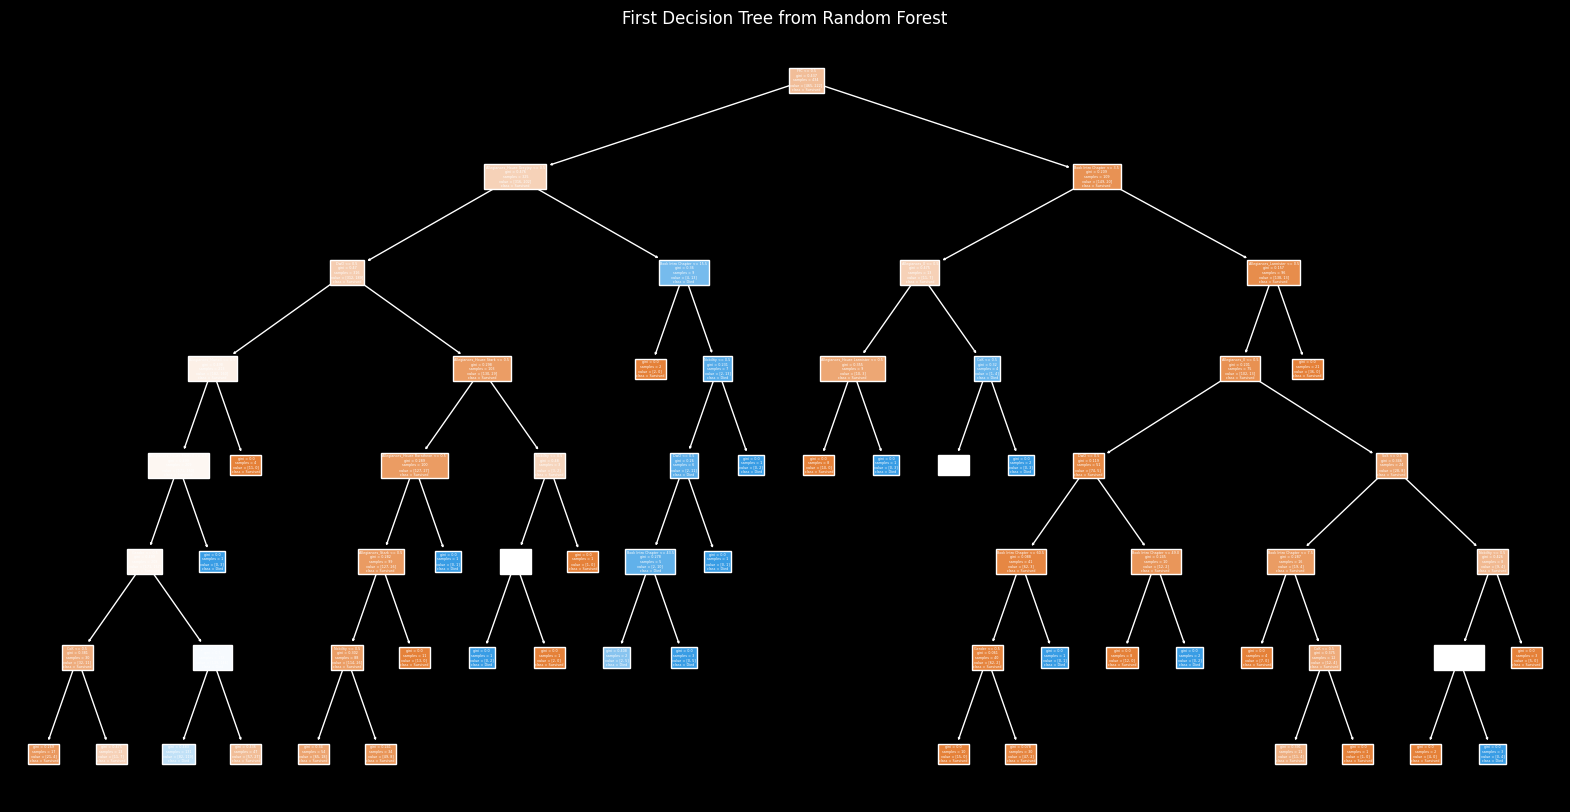

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix, roc_auc_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# 步驟1: 載入訓練和測試資料
train_data = pd.read_csv("D:/hsnu ntpustat nycumot/nycu 2/character-deaths.csv")
test_data = pd.read_csv("D:/download2/test.csv")

# 在train_data中根據'Death Year'創建'Death'列
train_data['Death'] = train_data['Death Year'].notna().astype(int)

# 步驟2: 資料預處理
train_data.fillna(0, inplace=True)
train_data = pd.get_dummies(train_data, columns=['Allegiances'])

X = train_data.drop(['Death', 'Name', 'Death Year', 'Death Chapter', 'Book of Death'], axis=1)
y = train_data['Death']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# 同樣地準備test_data
test_data.fillna(0, inplace=True)
test_data = pd.get_dummies(test_data, columns=['Allegiances'])
X_test = test_data.drop(['Character', 'Name'], axis=1)

# 隨機森林
random_forest = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=42)
random_forest.fit(X_train, y_train)

y_val_pred_rf = random_forest.predict(X_val)
precision_rf = precision_score(y_val, y_val_pred_rf)
recall_rf = recall_score(y_val, y_val_pred_rf)
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
auc_rf = roc_auc_score(y_val, y_val_pred_rf)

print("隨機森林結果:")
print(f"精確度: {precision_rf:.2f}")
print(f"召回率: {recall_rf:.2f}")
print(f"準確率: {accuracy_rf:.2f}")
print(f"AUC: {auc_rf:.2f}")

# 顯示隨機森林的混淆矩陣
conf_matrix_rf = confusion_matrix(y_val, y_val_pred_rf)
print("隨機森林的混淆矩陣:")
print(conf_matrix_rf)

# 可視化隨機森林中的第一棵決策樹
plt.figure(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X_train.columns.tolist(), class_names=["Survived", "Died"], max_depth=15)
plt.title("First Decision Tree from Random Forest")
plt.show()

# 步驟4: 使用隨機森林在測試資料集上進行預測
y_pred_rf = random_forest.predict(X_test)

# 準備隨機森林結果的提交文件，帶有正確的角色ID
submission_df_rf = pd.DataFrame({
    'Character': test_data['Character'],
    'Death': y_pred_rf
})

# 將隨機森林結果保存為CSV文件
submission_df_rf.to_csv('submission_random_forest.csv', index=False)


1.	載入所需的套件和工具
•	用於資料處理、模型訓練、和結果評估。
2.	步驟1: 資料讀取
•	從特定路徑讀取訓練資料和測試資料。
3.	建立'Death'欄位
•	根據'Death Year'的有無，建立'Death'欄位，表示角色是否已死亡（1代表死亡，0代表存活）。
4.	步驟2: 資料前處理
•	將資料中的空值替換成0。
•	將'Allegiances'欄位進行One-hot Encoding，產生多個dummy特徵。
•	從訓練資料中移除不需要的欄位。
•	將資料拆分成訓練集和驗證集。
5.	建立隨機森林模型
•	初始化並訓練隨機森林模型。
•	使用驗證集進行預測。
6.	評估模型效能
•	計算並輸出精確度、召回率、準確率和AUC。
•	輸出混淆矩陣。
7.	視覺化模型
•	繪製隨機森林中的第一棵決策樹。
8.	使用模型進行預測
•	使用訓練好的隨機森林模型，對測試資料進行預測。
9.	保存預測結果
•	將預測結果結合角色名稱，保存為CSV文件，供後續使用或提交。	


## 如果用xgboost,那kaggle上的分數會大幅提高許多

In [28]:
import xgboost as xgb

# 創建XGBoost分類器
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=100, seed=42)

# 訓練模型
xgb_model.fit(X_train, y_train)

# 用XGBoost模型對驗證集進行預測
y_val_pred_xgb = xgb_model.predict(X_val)

# 計算各種評價指標
precision_xgb = precision_score(y_val, y_val_pred_xgb)
recall_xgb = recall_score(y_val, y_val_pred_xgb)
accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
auc_xgb = roc_auc_score(y_val, y_val_pred_xgb)

print("XGBoost結果:")
print(f"精確度: {precision_xgb:.2f}")
print(f"召回率: {recall_xgb:.2f}")
print(f"準確率: {accuracy_xgb:.2f}")
print(f"AUC: {auc_xgb:.2f}")

# 顯示XGBoost的混淆矩陣
conf_matrix_xgb = confusion_matrix(y_val, y_val_pred_xgb)
print("XGBoost的混淆矩陣:")
print(conf_matrix_xgb)

# 使用XGBoost在測試資料集上進行預測
y_pred_xgb = xgb_model.predict(X_test)

# 準備XGBoost結果的提交文件，帶有正確的角色ID
submission_df_xgb = pd.DataFrame({
    'Character': test_data['Character'],
    'Death': y_pred_xgb
})

# 將XGBoost結果保存為CSV文件
submission_df_xgb.to_csv('submission_xgboost.csv', index=False)


XGBoost結果:
精確度: 0.63
召回率: 0.55
準確率: 0.74
AUC: 0.70
XGBoost的混淆矩陣:
[[129  25]
 [ 34  42]]


1.	導入XGBoost模塊：讓我們可以使用XGBoost方法。
2.	建立XGBoost分類器：配置和初始化XGBoost模型。
3.	訓練模型：使用訓練數據X_train和y_train訓練XGBoost模型。
4.	進行驗證集預測：使用模型預測驗證集的輸出。
5.	計算和輸出評價指標：評估模型在驗證集上的表現。
6.	生成混淆矩陣：提供模型預測的正確性和錯誤性資訊。
7.	預測測試資料集：使用模型預測測試數據集的輸出。
8.	保存預測結果：將預測結果保存為CSV文件。


## 如果使用RandomizedSearchCV，反而效果降低了

In [29]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# 定義要調整的參數及其範圍
param_dist = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(5, 21)),
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 2),
    'bootstrap': [True, False],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 使用RandomizedSearchCV對參數進行優化
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1,
    random_state=42
)

# 開始優化
random_search.fit(X_train, y_train)

# 使用最佳參數的模型進行驗證集上的預測
best_rf = random_search.best_estimator_
y_val_pred_best_rf = best_rf.predict(X_val)
accuracy_best_rf = accuracy_score(y_val, y_val_pred_best_rf)

print("使用最佳參數的隨機森林準確率:")
print(f"準確率: {accuracy_best_rf:.2f}")

# 如果想看詳細的最佳參數
print("最佳參數：", random_search.best_params_)
# 使用最佳模型在測試資料集上進行預測
y_pred_best_rf = best_rf.predict(X_test)

# 準備隨機森林結果的提交文件，帶有正確的角色ID
submission_df_best_rf = pd.DataFrame({
    'Character': test_data['Character'],
    'Death': y_pred_best_rf
})

# 將隨機森林結果保存為CSV文件
submission_df_best_rf.to_csv('submission_best_random_forest.csv', index=False)


Fitting 5 folds for each of 100 candidates, totalling 500 fits
使用最佳參數的隨機森林準確率:
準確率: 0.72
最佳參數： {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
170 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
77 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py",

1.	導入必要的模塊：RandomizedSearchCV和numpy。
2.	定義參數範圍：為隨機森林模型中的幾個主要參數設定一系列可能的值。
3.	初始化隨機參數搜索：使用RandomizedSearchCV，它會在指定的參數範圍中隨機選擇參數組合，然後使用交叉驗證評估這些組合。
4.	訓練模型：用fit方法訓練隨機參數搜索模型。
5.	選擇最佳模型：從搜索中選擇最佳的隨機森林模型。
6.	在驗證集上進行預測：使用最佳模型在驗證集上進行預測。
7.	輸出模型性能：計算並輸出最佳模型在驗證集上的精度。
8.	顯示最佳參數：輸出最佳模型的參數。
9.	在測試集上進行預測：使用最佳模型在測試集上進行預測。
10.	準備提交文件：將預測結果和相應的角色ID保存到DataFrame中。
11.	保存預測結果到CSV：將預測結果保存為CSV文件，以供之後提交或進一步分析。

## *topic11 PCA 、SVD 及其在影像處理的應用*

In [30]:
from scipy.io import loadmat

# 使用正確的路徑讀取.mat文件
mnist = loadmat("D:\\download2\\mnist-original.mat")
X = mnist["data"]
y = mnist["label"][0]

In [31]:
digit_to_show = 3
Digit = X[:, y == digit_to_show]

### 一、將一張圖像 X 利用 SVD 的 “Rank q approximation”，能達到壓縮的目的並保持圖像的品質。比較下列幾種對於圖像矩陣 X 的重組安排，並進行 “Rank q approximation”，在同樣的壓縮比之下，觀察還原後的圖像品質哪個最好？

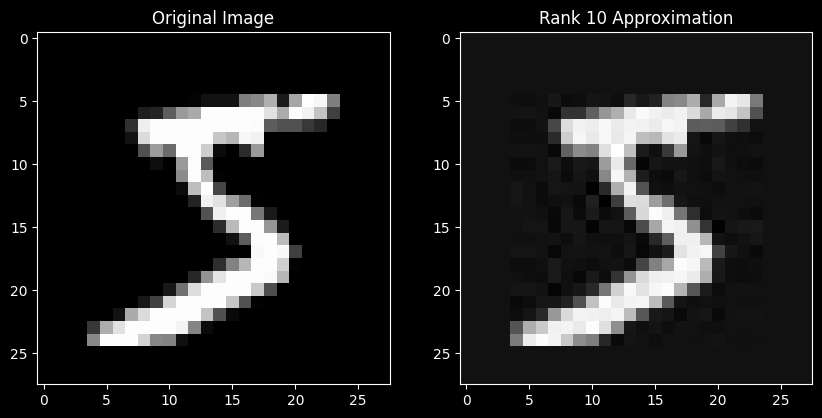

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import svd

# 讀取數據
mnist = loadmat("D:\\download2\\mnist-original.mat")
X = mnist["data"].T
y = mnist["label"][0]

def rank_q_approximation(X, q):
    """進行 Rank q approximation."""
    U, s, Vh = svd(X, full_matrices=False)
    S = np.diag(s[:q])
    X_q = np.dot(U[:, :q], np.dot(S, Vh[:q, :]))
    return X_q

# 選擇一個數字5的圖像
digit_to_show = 5
Digit = X[y == digit_to_show][0].reshape(28, 28)

# 進行 Rank q approximation
q = 10
Digit_q = rank_q_approximation(Digit, q)

# 顯示原始圖像和近似圖像
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(Digit, cmap="gray")
ax[0].set_title("Original Image")
ax[1].imshow(Digit_q, cmap="gray")
ax[1].set_title(f"Rank {q} Approximation")
plt.show()


### 載入必要的函式庫:
### numpy: 用於數值運算。
matplotlib.pyplot: 用於繪圖。
scipy.io: 用於載入 MATLAB .mat 檔案。
scipy.linalg: 用於做線性代數的操作，特別是奇異值分解(SVD)。

### 讀取MNIST數據集:
使用loadmat函數從指定路徑讀取MNIST數據集（這是手寫數字的圖像數據集）。
從.mat檔案中取出數據和標籤，分別儲存於X和y中。

### 定義Rank-q近似函數:
定義了一個函數rank_q_approximation，該函數接受一個矩陣X和一個整數q作為參數。
使用奇異值分解(SVD)對矩陣X進行分解，得到U, s, 和 Vh。
只取前q個奇異值（和相對應的U和Vh的列或行）來進行近似。
使用這些q個奇異值及其相應的U和Vh來重構矩陣，得到近似的X_q。

### 選擇和處理一個數字5的圖像:
從MNIST數據集中選取數字5的一個實例，並將其轉換為28x28的圖像格式。
使用上述定義的rank_q_approximation函數，對該圖像進行Rank-q近似。

### 繪製和顯示圖像:
使用matplotlib繪製兩個子圖：一個為原始的數字5圖像，另一個為經過Rank-q近似後的圖像。
最後，使用plt.show()展示這兩個圖像。
總結：這段程式碼主要是展示如何使用奇異值分解(SVD)的Rank-q近似來近似圖像，以及近似後的效果是什麼樣子。

### 二、處理大量影像前，有必要觀看影像圖，以確定能掌握將要處理的影像及其資料型態。以 70000 張手寫圖像為例，每個數字約 7000 字，需要寫一段程式碼來觀察這些手寫數字的影像與品質，且每次執行都能隨機觀看到不同的影像，

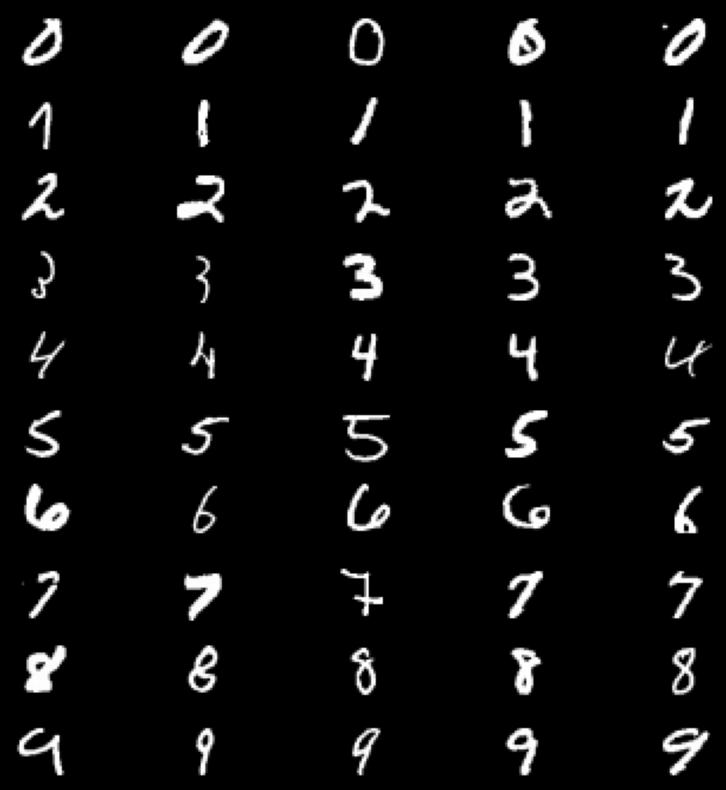

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

# 讀取MNIST數據
mnist = loadmat("D:\\download2\\mnist-original.mat")
X = mnist["data"].T
y = mnist["label"][0]

def display_random_digits(X, y, n=5):
    """顯示 n 個隨機的手寫數字."""
    fig, ax = plt.subplots(10, n, figsize=(10, 10))
    
    for digit in range(10):
        # 獲取所有當前數字的索引
        idxs = np.where(y == digit)[0]
        
        # 隨機選擇 n 個索引
        random_idxs = np.random.choice(idxs, replace=False, size=n)
        
        for i, idx in enumerate(random_idxs):
            ax[digit, i].imshow(X[idx].reshape(28, 28), cmap='gray')
            ax[digit, i].axis('off')
    
    plt.show()

# 調用函數以顯示隨機的手寫數字
display_random_digits(X, y)


載入必要的函式庫:
numpy: 用於數值運算。
matplotlib.pyplot: 用於繪圖。
scipy.io: 用於載入 MATLAB .mat 檔案。

讀取MNIST數據集:
使用loadmat函數從指定路徑讀取MNIST數據集。
從.mat檔案中取出數據和標籤，分別儲存於X和y中。

定義顯示隨機手寫數字的函數:
函數名為display_random_digits，接受數據X、標籤y以及一個參數n（表示要顯示的每個數字的圖像數量）。
函數首先建立一個10xn的子圖格局（10代表0到9的10個數字）。
對於每個數字（從0到9），程式碼執行以下操作：
查找該數字的所有索引。
從這些索引中隨機選擇n個索引。
使用這n個索引顯示這n個圖像。
所有選擇的圖像都會在子圖上繪製，而坐標軸則被關閉。

呼叫函數並顯示手寫數字:
調用上述定義的display_random_digits函數，從數據集中隨機選擇並顯示手寫數字。

### 三、每張大小 28×28 的手寫數字圖像 70000 張，不經壓縮前的儲存空間為 54.88 M Bytes。若進行 SVD 的 “Rank q approximation”，則壓縮倍數由 q 決定。寫一支程式，當調整 q 值時，可以算出壓縮的倍數，並同時顯示原圖與壓縮後還原的圖各 100 張做為比較（任選 100 張）。另外 q 的選擇可以根據$$ \sigma_1, \sigma_2, \cdots,  \sigma_r $$的「能量配置」來決定，或說決定 q 之後，可以計算所採用的主成分的能量佔比，本題也可以順便列印出這個佔比。

Compression Ratio for q=50: 15.6735
Energy Ratio for q=50: 0.9634


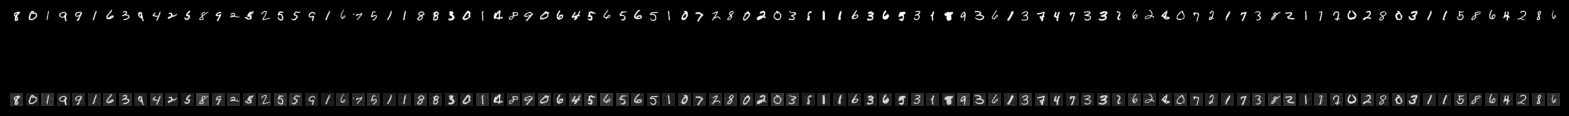

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.linalg import svd

# 讀取數據
mnist = loadmat("D:\\download2\\mnist-original.mat")
X = mnist["data"].T
y = mnist["label"][0]

def rank_q_approximation(X, q):
    U, s, Vh = svd(X, full_matrices=False)
    S = np.diag(s[:q])
    X_q = np.dot(U[:, :q], np.dot(S, Vh[:q, :]))
    return X_q, s

def compression_ratio(q):
    original_size = 28 * 28 * 70000
    compressed_size = q * 70000 + q + q * 28
    return original_size / compressed_size

def energy_ratio(s, q):
    return np.sum(s[:q]**2) / np.sum(s**2)

def display_compression(X, q):
    fig, ax = plt.subplots(2, 100, figsize=(20, 2))
    random_idxs = np.random.choice(X.shape[0], size=100, replace=False)
    
    X_q, s = rank_q_approximation(X[random_idxs], q)
    for i, idx in enumerate(random_idxs):
        ax[0, i].imshow(X[idx].reshape(28, 28), cmap='gray')
        ax[0, i].axis('off')
        ax[1, i].imshow(X_q[i].reshape(28, 28), cmap='gray')
        ax[1, i].axis('off')
    
    print(f"Compression Ratio for q={q}: {compression_ratio(q):.4f}")
    print(f"Energy Ratio for q={q}: {energy_ratio(s, q):.4f}")
    
    plt.show()

# Adjust q value here
q_value = 50
display_compression(X, q_value)


載入必要的函式庫:

numpy: 用於數值運算。
matplotlib.pyplot: 用於繪圖。
scipy.io: 用於載入 MATLAB .mat 檔案。
scipy.linalg: 提供了SVD方法。

讀取MNIST數據集:
使用loadmat函數從指定路徑讀取MNIST數據集。
從.mat檔案中取出數據和標籤，分別儲存於X和y中。

定義Rank-q近似函數:
這個函數會對給定的矩陣X進行Rank-q的SVD近似。
它回傳近似後的圖像和所有的奇異值。

定義壓縮比計算函數:
這個函數計算原始數據和壓縮後的數據的大小之比。

定義能量佔比計算函數:
根據給定的所有奇異值和一個q值計算能量佔比。

定義壓縮和顯示函數:
這個函數先隨機選擇100張圖像。
對這些圖像進行Rank-q近似。
然後在一行中顯示原始的圖像，在另一行中顯示壓縮後還原的圖像。
最後，打印出壓縮比和能量佔比。

執行程式:
設定一個q_value。
調用display_compression函數，並將MNIST數據和q_value傳遞給它。

## *topic12 Sentiment analysis*
### 目的: 進行情緒分析預測，預測Amazon食品評價的正面或負面情緒。

### 資料:
使用由Kaggle提供的Reviews.csv資料集。
主要使用該資料集的前1萬筆數據。
主要使用"Text"和"Score"兩個欄位。其中，"Score"的值大於等於4的會被轉換為1(表示正面)，其餘的轉換為0(表示負面)。

### 資料前處理:
切割Text欄位的文字。
移除停頓詞(stop words)。
將文字數據轉換成向量格式，實作方法包括TF-IDF和Word2Vec。
模型建立:
使用隨機森林(Random Forest)進行情緒分類。

### 模型評估:
進行k-fold交叉驗證，其中k=4，以Accuracy作為評估指標。
Kaggle競賽的評估指標是AUC。

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

# 1. 資料前處理
df = pd.read_csv("D:\\hsnu ntpustat nycumot\\nycu 2\\資料探勘\\hw2\\Reviews.csv")

# a. 前處理
df = df[['Text', 'Score']][:10000]
df['Score'] = df['Score'].apply(lambda x: 1 if x >= 4 else 0)

# b. 去除停頓詞
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['Text'])

# c. 文字探勘前處理
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['Text'])

sentences = [text.split() for text in df['Text']]
model_w2v = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

def vectorize_sentence(sentence, model):
    vectors = [model.wv[word] for word in sentence if word in model.wv]
    return np.mean(vectors, axis=0)

X_word2vec = np.array([vectorize_sentence(sentence, model_w2v) for sentence in sentences])

# 2. 建模
clf_rf = RandomForestClassifier()

# 使用TF-IDF資料訓練模型
clf_rf_tfidf = RandomForestClassifier()
clf_rf_tfidf.fit(X_tfidf, df['Score'])
scores_tfidf = cross_val_score(clf_rf_tfidf, X_tfidf, df['Score'], cv=4)
print(f"TF-IDF準確率: {scores_tfidf.mean()}")

# 使用Word2Vec資料訓練模型
clf_rf_w2v = RandomForestClassifier()
clf_rf_w2v.fit(X_word2vec, df['Score'])
scores_word2vec = cross_val_score(clf_rf_w2v, X_word2vec, df['Score'], cv=4)
print(f"Word2Vec準確率: {scores_word2vec.mean()}")

# 3. 載入測試數據並生成預測結果
test_df = pd.read_csv("D:\\hsnu ntpustat nycumot\\nycu 2\\資料探勘\\hw2\\test.csv")
test_tfidf = tfidf_vectorizer.transform(test_df['Text'])
predictions = clf_rf_tfidf.predict_proba(test_tfidf)[:, 1]  # 注意這裡我已經更改為使用clf_rf_tfidf模型

# 4. 儲存預測結果
submission_df = pd.DataFrame({
    "ID": test_df.index + 1, 
    "Score": predictions
})
submission_df.to_csv("D:\\hsnu ntpustat nycumot\\nycu 2\\資料探勘\\hw2\\kaggle_submission.csv", index=False)


TF-IDF準確率: 0.8042999999999999
Word2Vec準確率: 0.7686999999999999


1.	資料前處理:
•	資料載入: 從Reviews.csv文件中讀取數據。
•	選擇資料和變數：從數據中選擇前10,000筆記錄的 Text 和 Score。
•	標籤轉換：根據Score值，將評分大於或等於4的記錄標記為1，否則標記為0。
2.	文字向量化:
•	去除停頓詞：使用 CountVectorizer 將文本數據向量化，並去除英文停頓詞。
•	TF-IDF 文字探勘：使用 TfidfVectorizer 將文本數據轉化為TF-IDF向量。
•	Word2Vec 文字探勘:
•	首先，將每條評論分割為單詞。
•	使用 gensim 的 Word2Vec 對句子進行訓練，得到每個單詞的向量表示。
•	針對每條評論，使用vectorize_sentence函數計算其所有單詞向量的平均值作為評論的向量表示。
3.	模型訓練:
•	隨機森林與TF-IDF：使用TF-IDF向量作為特征來訓練隨機森林模型。之後使用交叉驗證來評估該模型的準確率。
•	隨機森林與Word2Vec：使用Word2Vec生成的向量作為特征來訓練另一個隨機森林模型。使用交叉驗證評估模型的準確率。
4.	預測和結果儲存:
•	載入測試數據：從 test.csv 文件中讀取測試數據。
•	預測：使用先前訓練的TF-IDF隨機森林模型對測試數據進行預測。
•	儲存結果：將預測結果儲存到 kaggle_submission.csv 文件中，文件包含每條記錄的ID和預測得分。
